In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
dfprop = pd.read_csv('orbiting_objects.csv')
dfdec = pd.read_csv('decayed_objects.csv')
dfbox = pd.read_csv('box-data.csv')

In [16]:
dfbox.columns = dfbox.columns.str.lower()
dfprop.columns = dfprop.columns.str.lower()
dfdec.columns = dfdec.columns.str.lower()

In [17]:
dfprop.head()

,object_id,object_name,norad_cat_id,country,period,inclination,apogee,perigee,rcs_size,rcsvalue,launch,comment
0,2019-082B,CZ-4C R/B,44820,PRC,94.74,97.89,594.0,418.0,LARGE,0,2019-11-27,NaN
1,2019-082A,GAOFEN 12,44819,PRC,97.28,97.93,629.0,628.0,LARGE,0,2019-11-27,NaN
2,2019-081Q,OBJECT Q,44818,TBD,94.75,97.52,514.0,500.0,SMALL,0,2019-11-27,NaN
3,2019-081P,OBJECT P,44817,TBD,94.75,97.52,514.0,499.0,SMALL,0,2019-11-27,NaN
4,2019-081N,OBJECT N,44816,TBD,94.76,97.52,514.0,499.0,SMALL,0,2019-11-27,NaN


In [20]:
dfprop.comment.unique()

array([nan, 'SELENOCENTRIC ORBIT (MOON)', 'LUNAR IMPACT',
       'NO ELEMENTS AVAILABLE', 'HELIOCENTRIC ORBIT (SUN)',
       'BARYCENTRIC ORBIT (EARTH-MOON)', 'L1 LAGRANGIAN ORBIT',
       'L2 LAGRANGIAN ORBIT', 'MARS ORBIT', 'DOCKED TO ISS',
       'CIRCUMLUNAR', 'VENUS ORBIT', 'MARS IMPACT', 'DOCKED TO ETS 7',
       'SATURNIAN ORBIT (SATURN)', 'NO INITIAL ELEMENTS',
       'COLLIDED WITH SATELLITE', 'ESCAPED SOLAR SYSTEM'], dtype=object)

In [22]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20021 entries, 0 to 20020
Data columns (total 12 columns):
object_id       20021 non-null object
object_name     20021 non-null object
norad_cat_id    20021 non-null int64
country         20021 non-null object
period          19433 non-null float64
inclination     19433 non-null float64
apogee          19433 non-null float64
perigee         19433 non-null float64
rcs_size        18997 non-null object
rcsvalue        20021 non-null int64
launch          20021 non-null object
comment         587 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


In [21]:
dfdec.comment.unique()

array([nan, 'HELIOCENTRIC ORBIT (SUN)', 'NO ELEMENTS AVAILABLE',
       'LUNAR LANDING', 'LUNAR IMPACT', 'MARS LANDING',
       'SELENOCENTRIC ORBIT (MOON)', 'NO INITIAL ELEMENTS',
       'JOVIAN IMPACT', 'VENUS IMPACT', 'VENUS LANDING', 'VENUS ORBIT',
       'CIRCUMLUNAR', 'MARS IMPACT'], dtype=object)

In [126]:
dfinfotot = pd.concat([dfprop, dfdec])
dfinfotot['debc'] = dfinfotot.object_name.apply(lambda x: 'True' if str(x).endswith(' DEB') else 'False')
dfprop['debc'] = dfprop.object_name.apply(lambda x: 'True' if str(x).endswith(' DEB') else 'False')
dfdec['debc'] = dfdec.object_name.apply(lambda x: 'True' if str(x).endswith(' DEB') else 'False')

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
dfinfotot

,APOGEE,COMMENT,COUNTRY,DECAY,INCLINATION,LAUNCH,NORAD_CAT_ID,OBJECT_ID,OBJECT_NAME,PERIGEE,PERIOD,RCSVALUE,RCS_SIZE,debc
0,594.0,NaN,PRC,NaN,97.89,2019-11-27,44820,2019-082B,CZ-4C R/B,418.0,94.74,0,LARGE,False
1,629.0,NaN,PRC,NaN,97.93,2019-11-27,44819,2019-082A,GAOFEN 12,628.0,97.28,0,LARGE,False
2,514.0,NaN,TBD,NaN,97.52,2019-11-27,44818,2019-081Q,OBJECT Q,500.0,94.75,0,SMALL,False
3,514.0,NaN,TBD,NaN,97.52,2019-11-27,44817,2019-081P,OBJECT P,499.0,94.75,0,SMALL,False
4,514.0,NaN,TBD,NaN,97.52,2019-11-27,44816,2019-081N,OBJECT N,499.0,94.76,0,SMALL,False
5,514.0,NaN,TBD,NaN,97.52,2019-11-27,44815,2019-081M,OBJECT M,499.0,94.76,0,SMALL,False
6,515.0,NaN,TBD,NaN,97.52,2019-11-27,44814,2019-081L,OBJECT L,499.0,94.77,0,SMALL,False
7,515.0,NaN,TBD,NaN,97.52,2019-11-27,44813,2019-081K,OBJECT K,499.0,94.77,0,MEDIUM,False
8,516.0,NaN,TBD,NaN,97.52,2019-11-27,44812,2019-081J,OBJECT J,499.0,94.77,0,SMALL,False
9,516.0,NaN,TBD,NaN,97.52,2019-11-27,44811,2019-081H,OBJECT H,499.0,94.77,0,SMALL,False


In [13]:
dfbox.head()

,country,spadoc_cd,orbital_tba,orbital_payload_count,orbital_rocket_body_count,orbital_debris_count,orbital_total_count,decayed_payload_count,decayed_rocket_body_count,decayed_debris_count,decayed_total_count,country_total
0,ARAB SATELLITE COMMUNICATIONS ORGANIZATION,AB,0,14,0,0,14,1,0,0,1,15
1,ASIASAT CORP,AC,0,8,0,0,8,0,0,0,0,8
2,Republic of Angola,AGO,0,1,0,0,1,0,0,0,0,1
3,ALGERIA,ALG,0,6,0,0,6,0,0,0,0,6
4,ARGENTINA,ARGN,0,20,0,1,21,2,0,0,2,23


In [ ]:
dfbox['tot_debris'] = dfbox.orbital_debris_count

In [27]:
print(dfbox.spadoc_cd.unique())
print(dfbox.country.unique())
print(dfbox.country.nunique(),dfbox.spadoc_cd.nunique())

['AB' 'AC' 'AGO' 'ALG' 'ARGN' 'ASRA' 'AUS' 'AZER' 'BEL' 'BELA' 'BERM'
 'BGD' 'BGR' 'BOL' 'BRAZ' 'CA' 'CHBZ' 'CHLE' 'CIS' 'COL' 'CRI' 'CZCH'
 'DEN' 'ECU' 'EGYP' 'ESA' 'ESRO' 'EST' 'EUME' 'EUTE' 'FGER' 'FIN' 'FR'
 'FRIT' 'GER' 'GHA' 'GLOB' 'GREC' 'HUN' 'IM' 'IND' 'INDO' 'IRAN' 'IRAQ'
 'ISRA' 'ISS' 'IT' 'ITSO' 'JOR' 'JPN' 'KAZ' 'KEN' 'LAOS' 'LKA' 'LTU'
 'LUXE' 'MA' 'MALA' 'MEX' 'MNG' 'NATO' 'NETH' 'NICO' 'NIG' 'NKOR' 'NOR'
 'NPL' 'NZ' 'O3B' 'ORB' 'PAKI' 'PER' 'POL' 'POR' 'PRC' 'RASC' 'ROC' 'ROM'
 'RP' 'RWA' 'SAFR' 'SAUD' 'SDN' 'SEAL' 'SES' 'SING' 'SKOR' 'SPN' 'STCT'
 'SWED' 'SWTZ' 'TBD' 'THAI' 'TMMC' 'TURK' 'UAE' 'UK' 'UKR' 'URY' 'US'
 'USBZ' 'VENZ' 'VTNM' 'ALL']
['ARAB SATELLITE COMMUNICATIONS ORGANIZATION' 'ASIASAT CORP'
 'Republic of Angola' 'ALGERIA' 'ARGENTINA' 'AUSTRIA' 'AUSTRALIA'
 'AZERBAIJAN' 'BELGIUM' 'BELARUS' 'BERMUDA'
 'PEOPLES REPUBLIC OF BANGLADESH' 'Bulgaria' 'BOLIVIA' 'BRAZIL' 'CANADA'
 'PEOPLES REPUBLIC OF CHINA/BRAZIL' 'CHILE'
 'COMMONWEALTH OF INDEPENDENT STATES' 'COLO

<IPython.core.display.Javascript object>


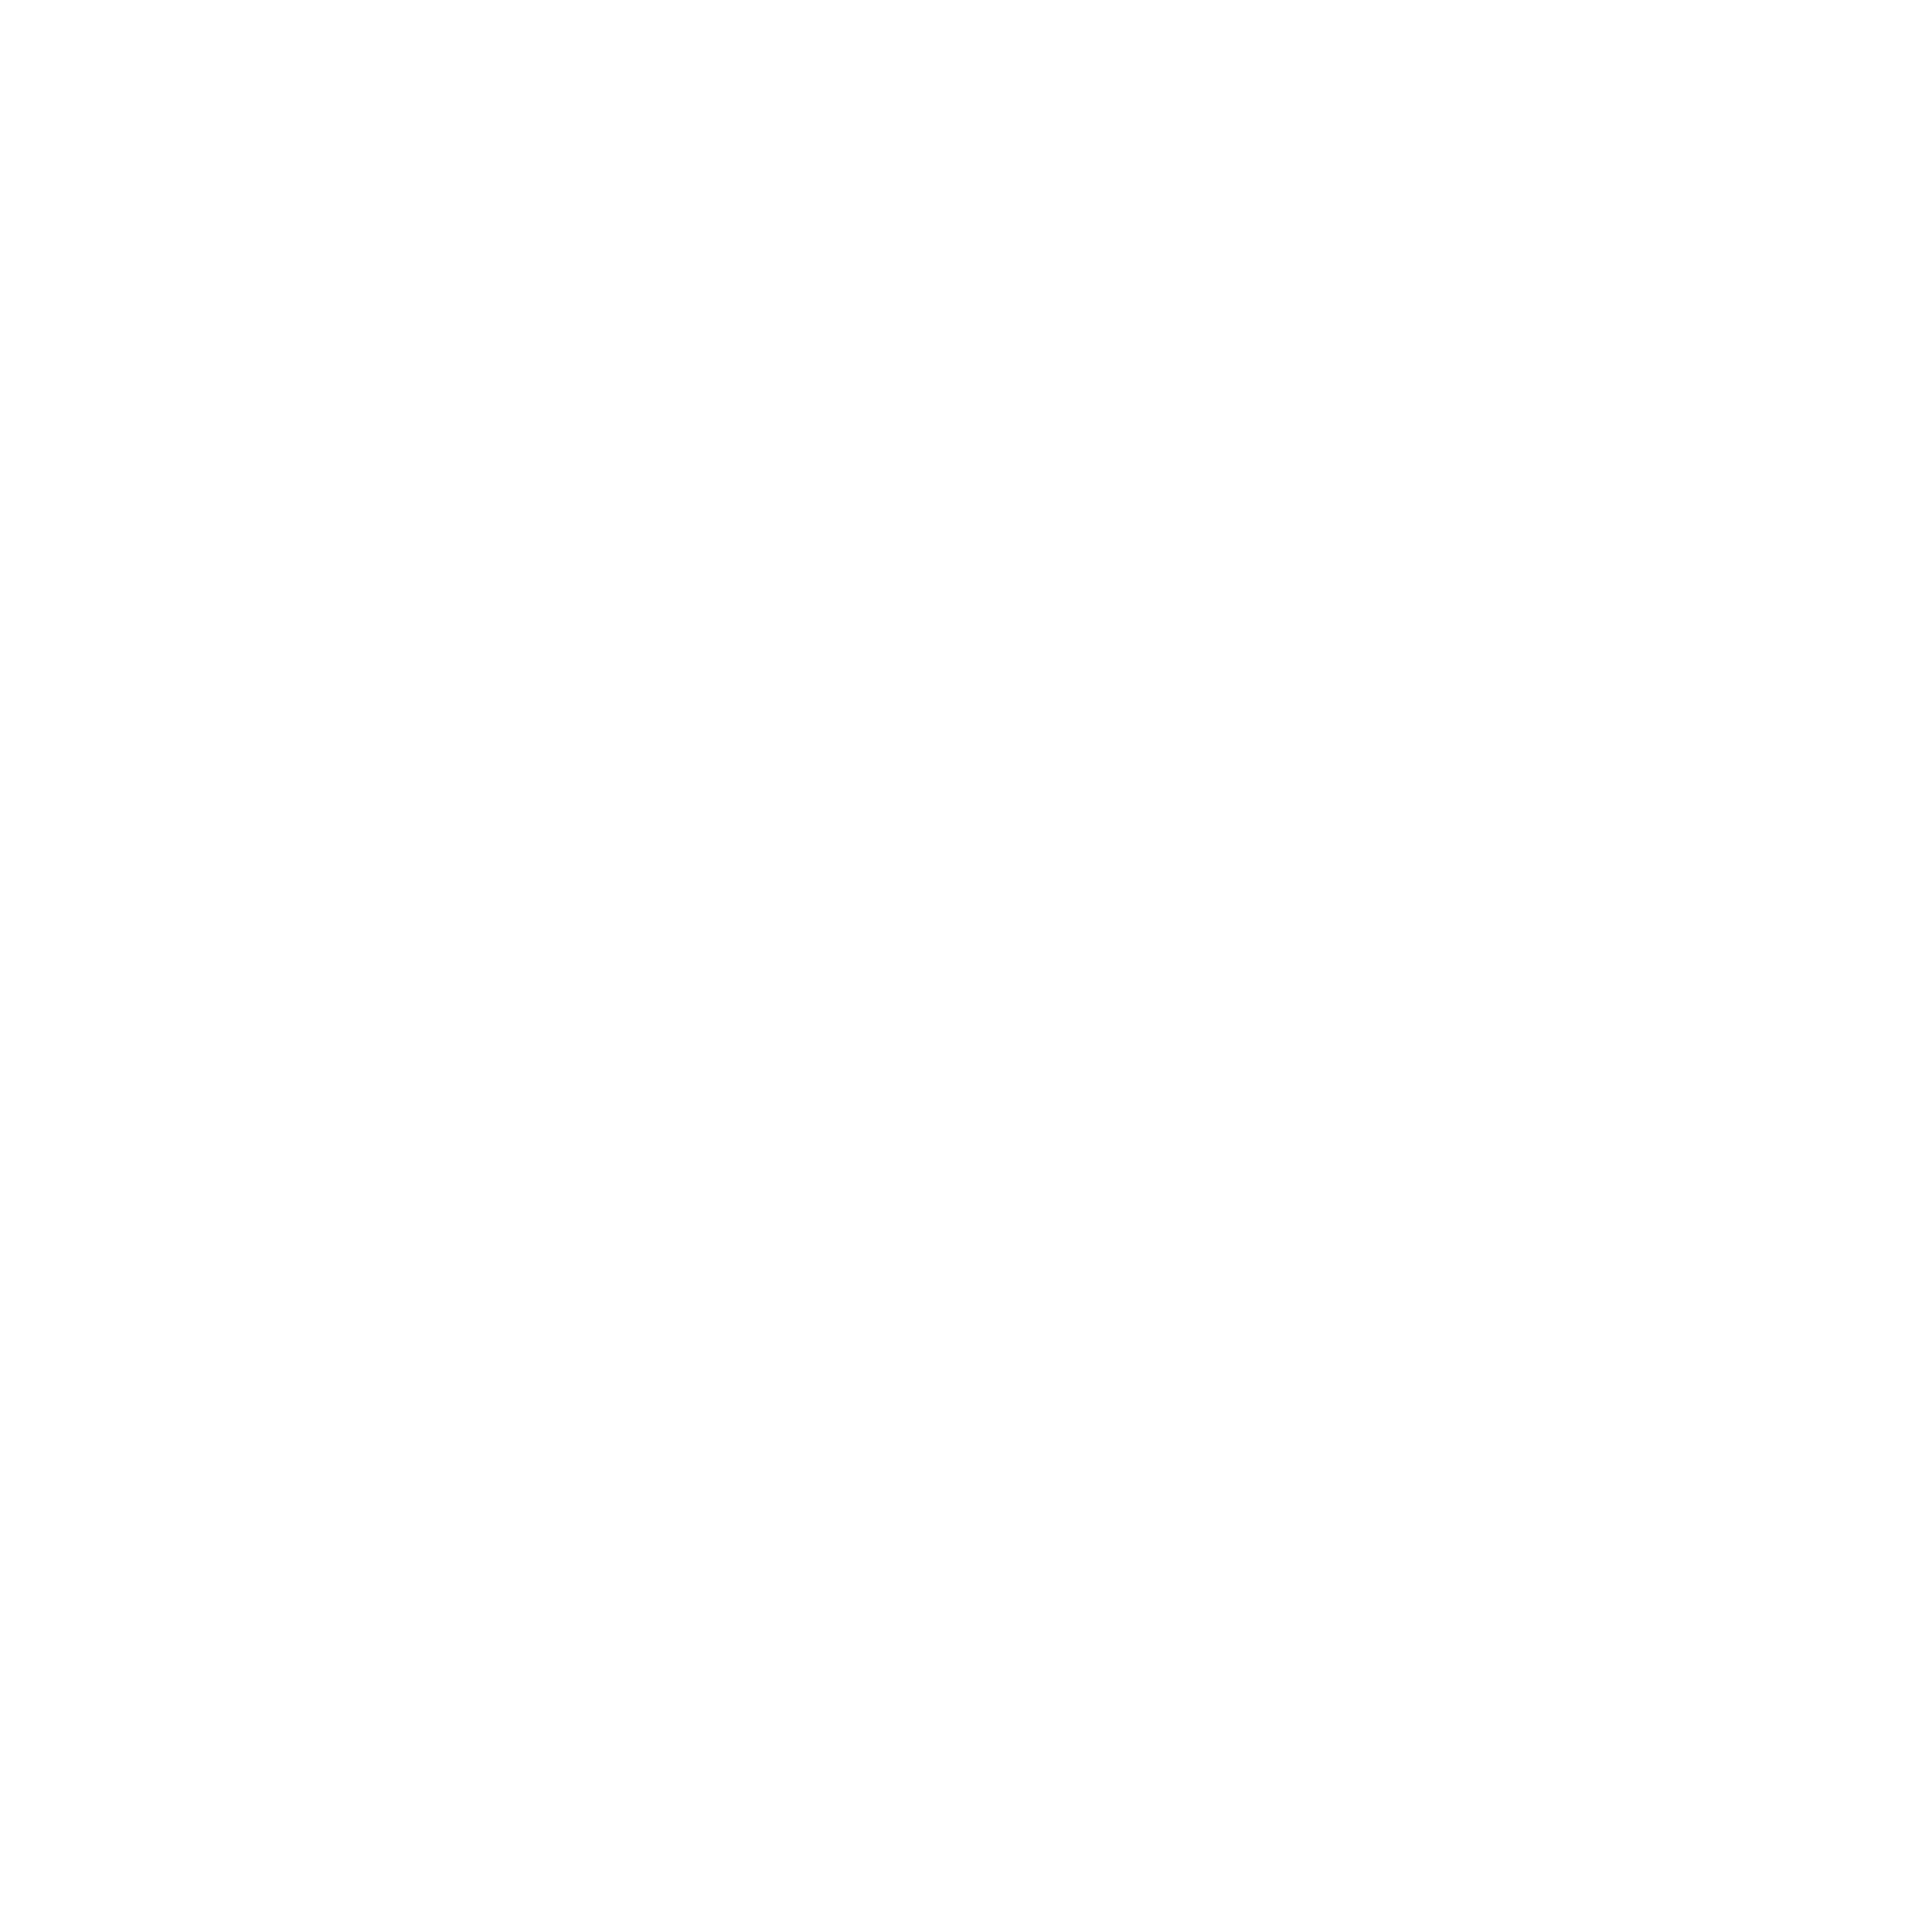

<IPython.core.display.Javascript object>


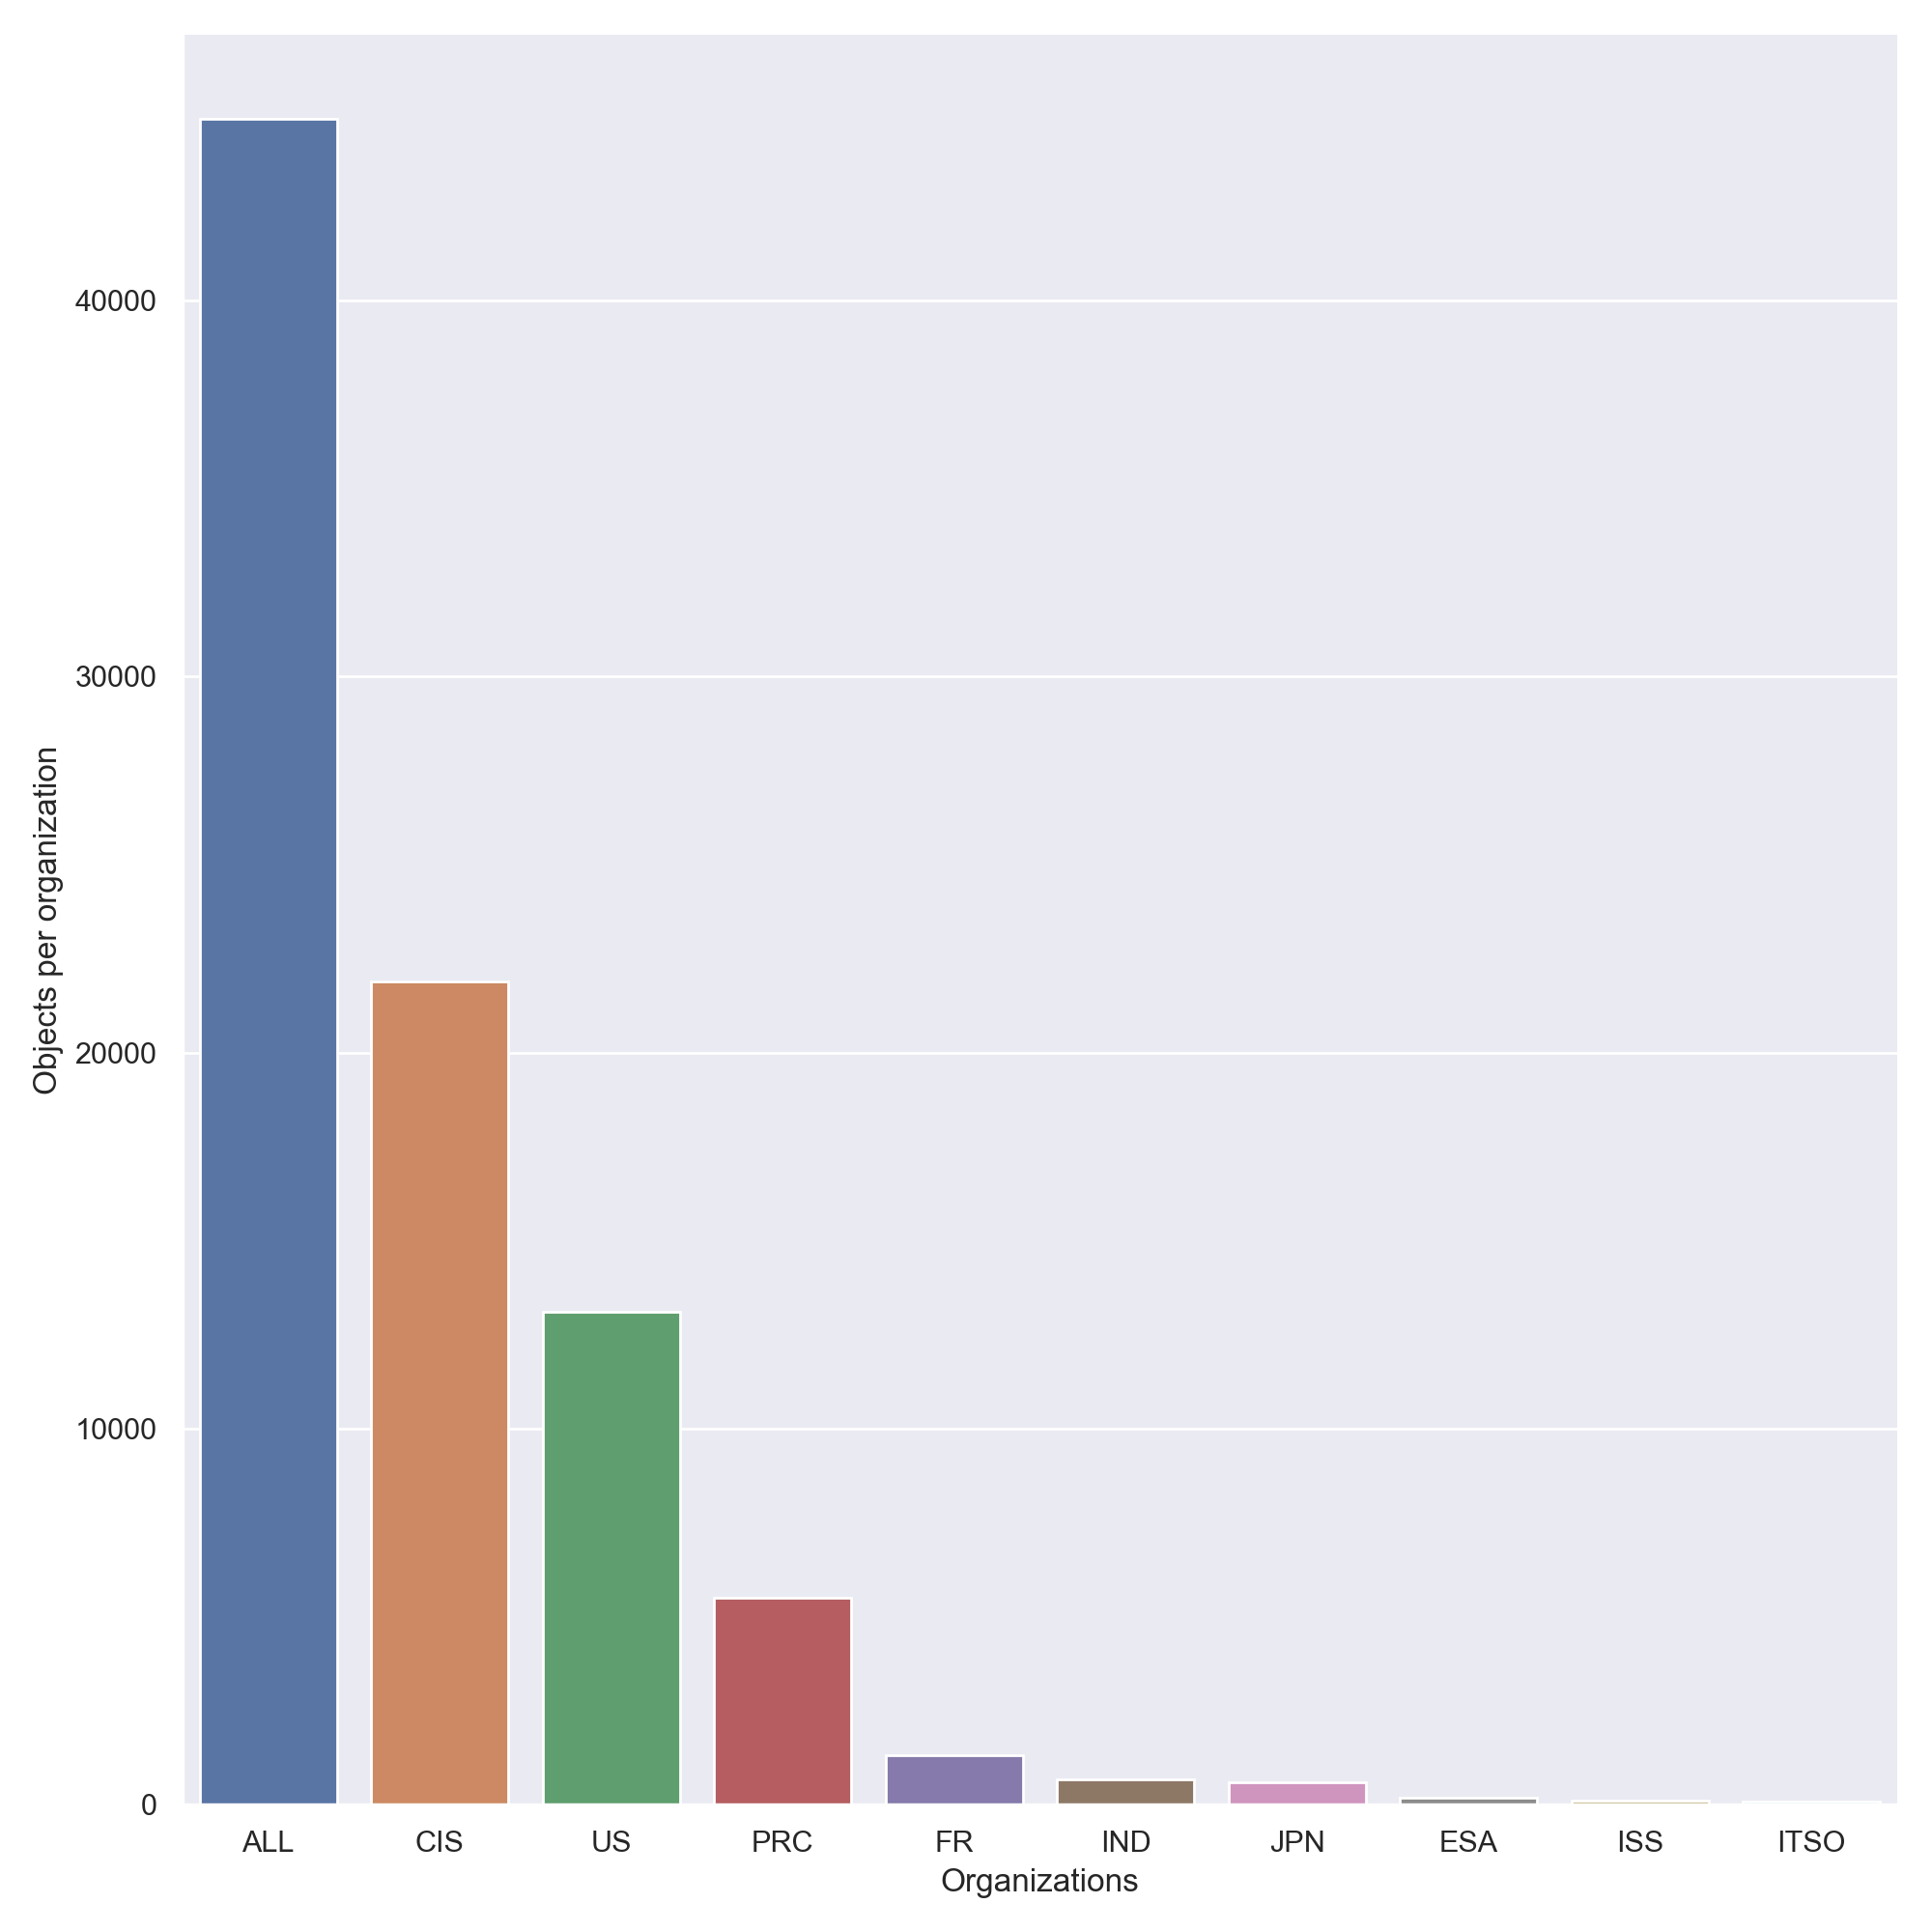

In [70]:
%matplotlib notebook
cats = list(dfbox.spadoc_cd.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfbox.groupby('spadoc_cd').get_group(x).country_total.values[0])
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
Cat_d = Cat_d.sort_values('Values', ascending = False)
Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Organizations', ylabel='Objects per organization')
fig.savefig("All.png", format="png")
plt.show()

<IPython.core.display.Javascript object>


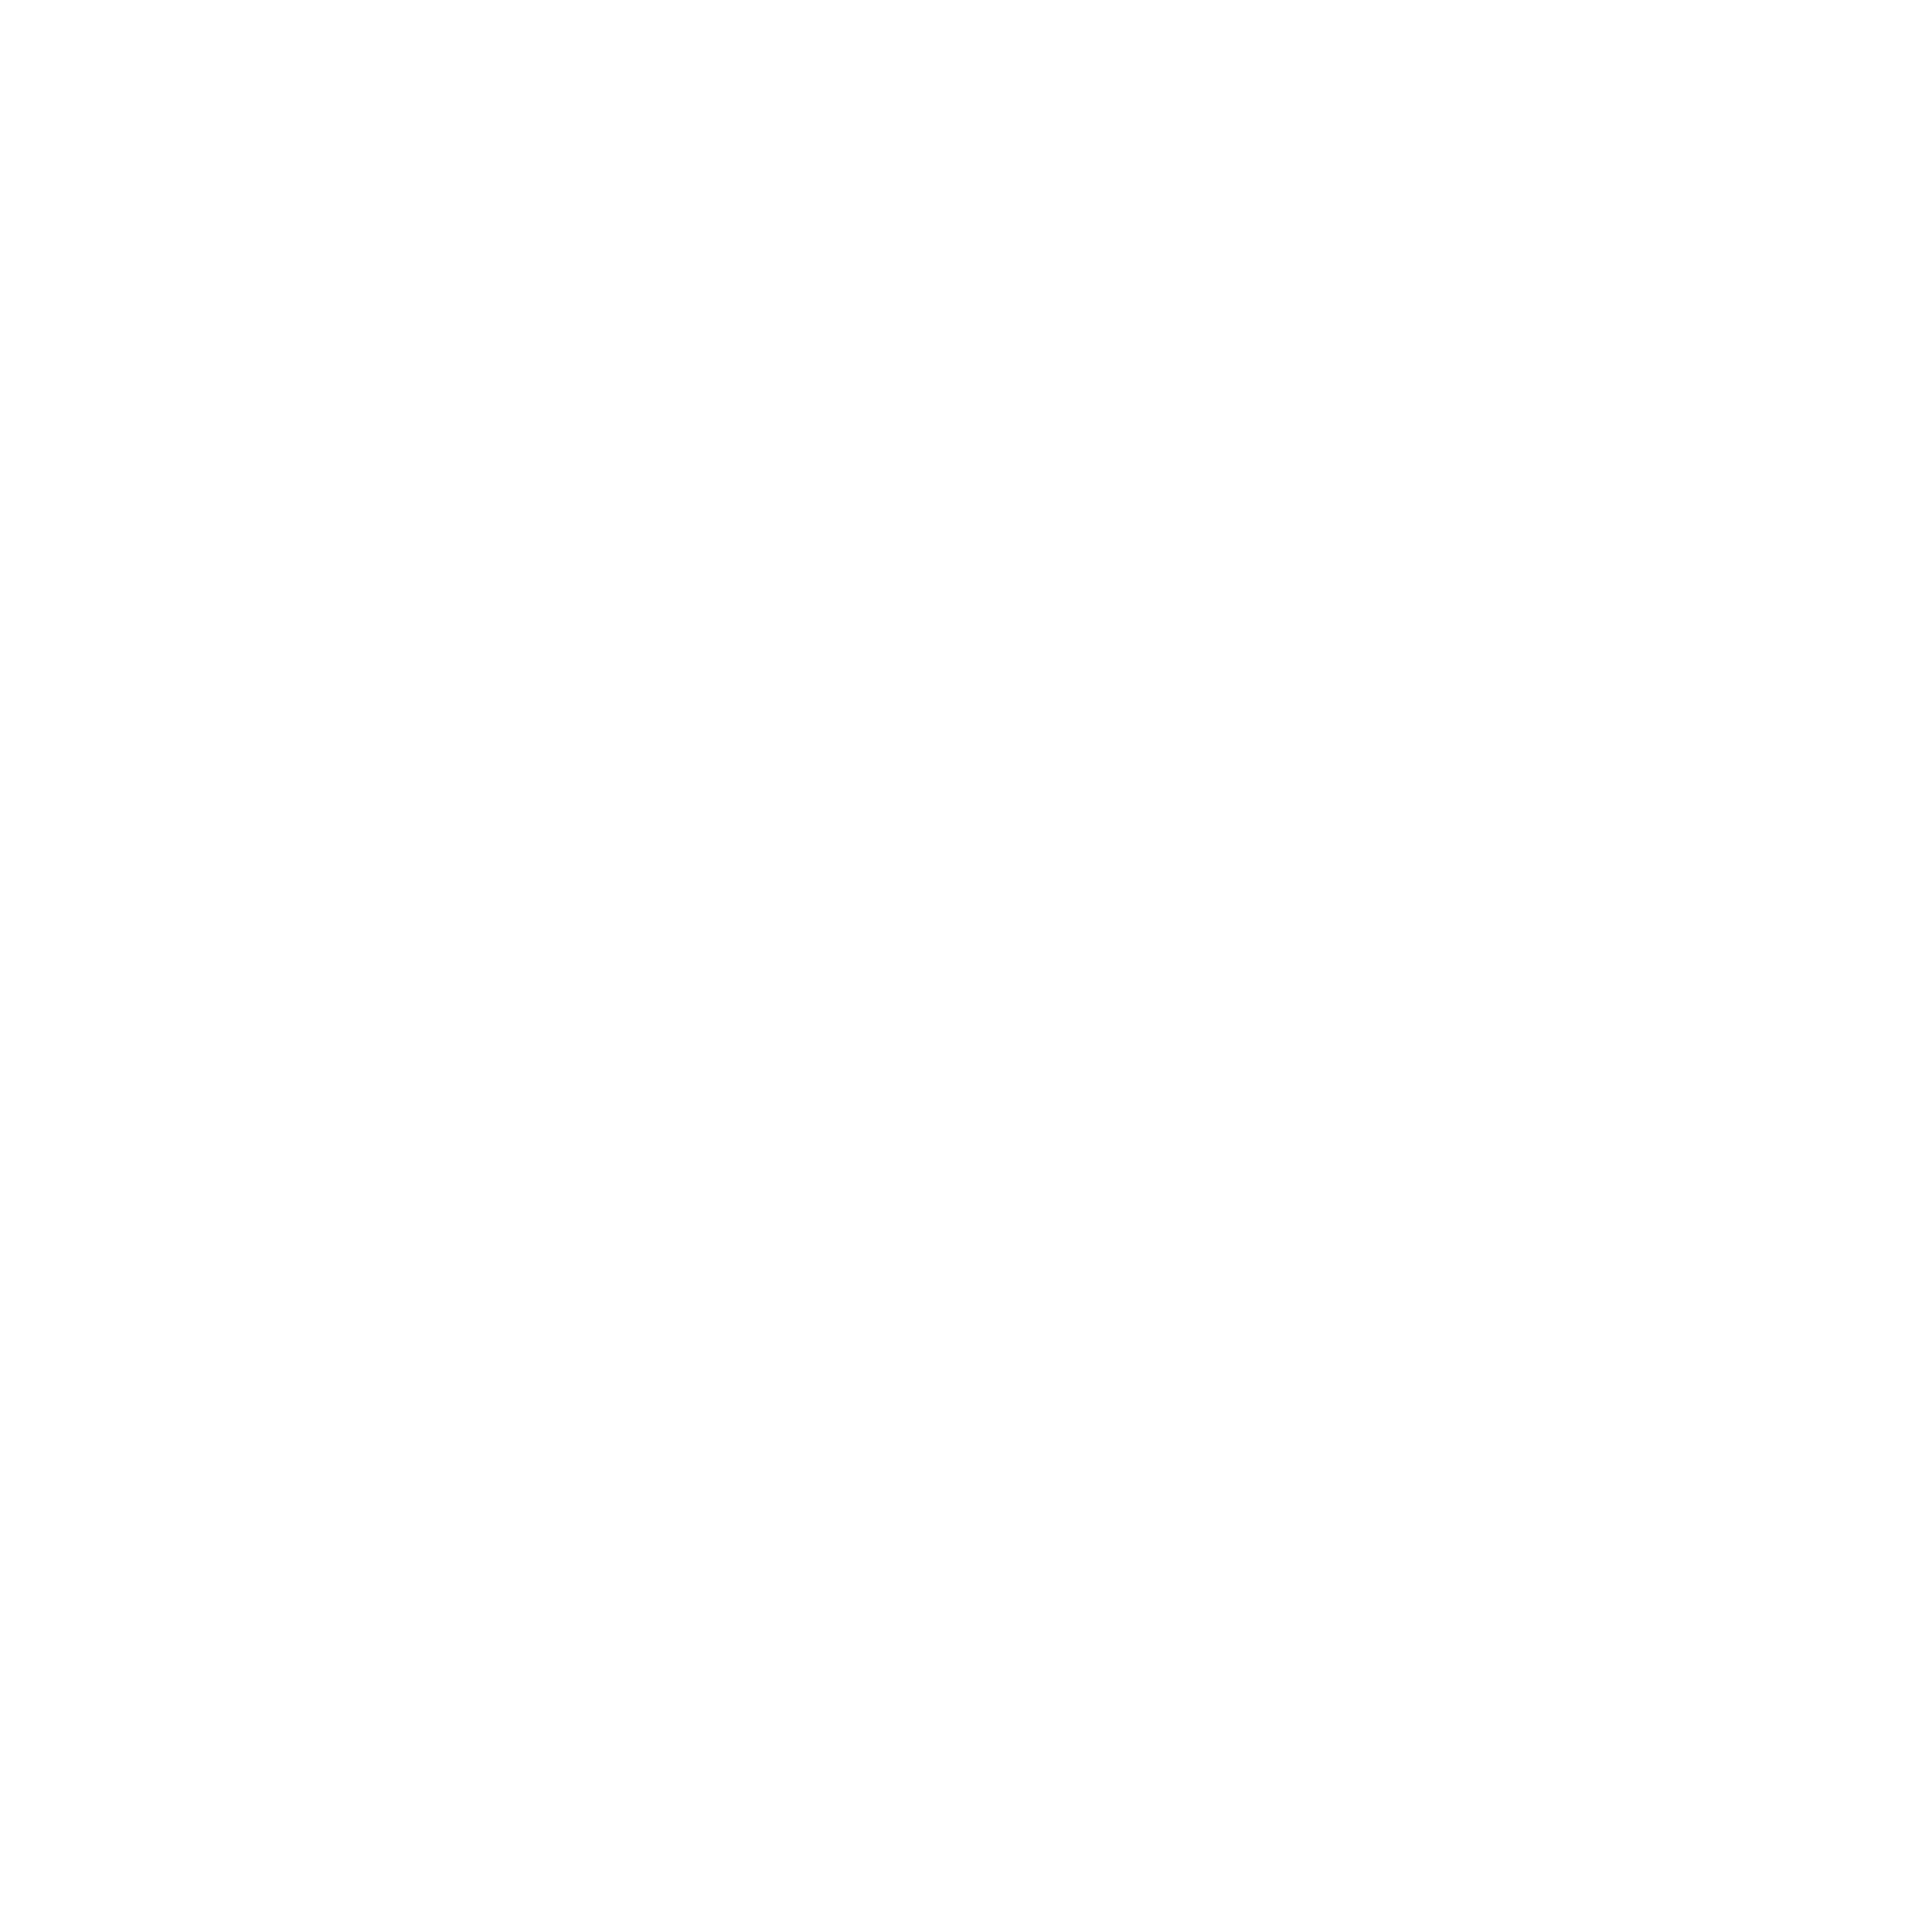

<IPython.core.display.Javascript object>


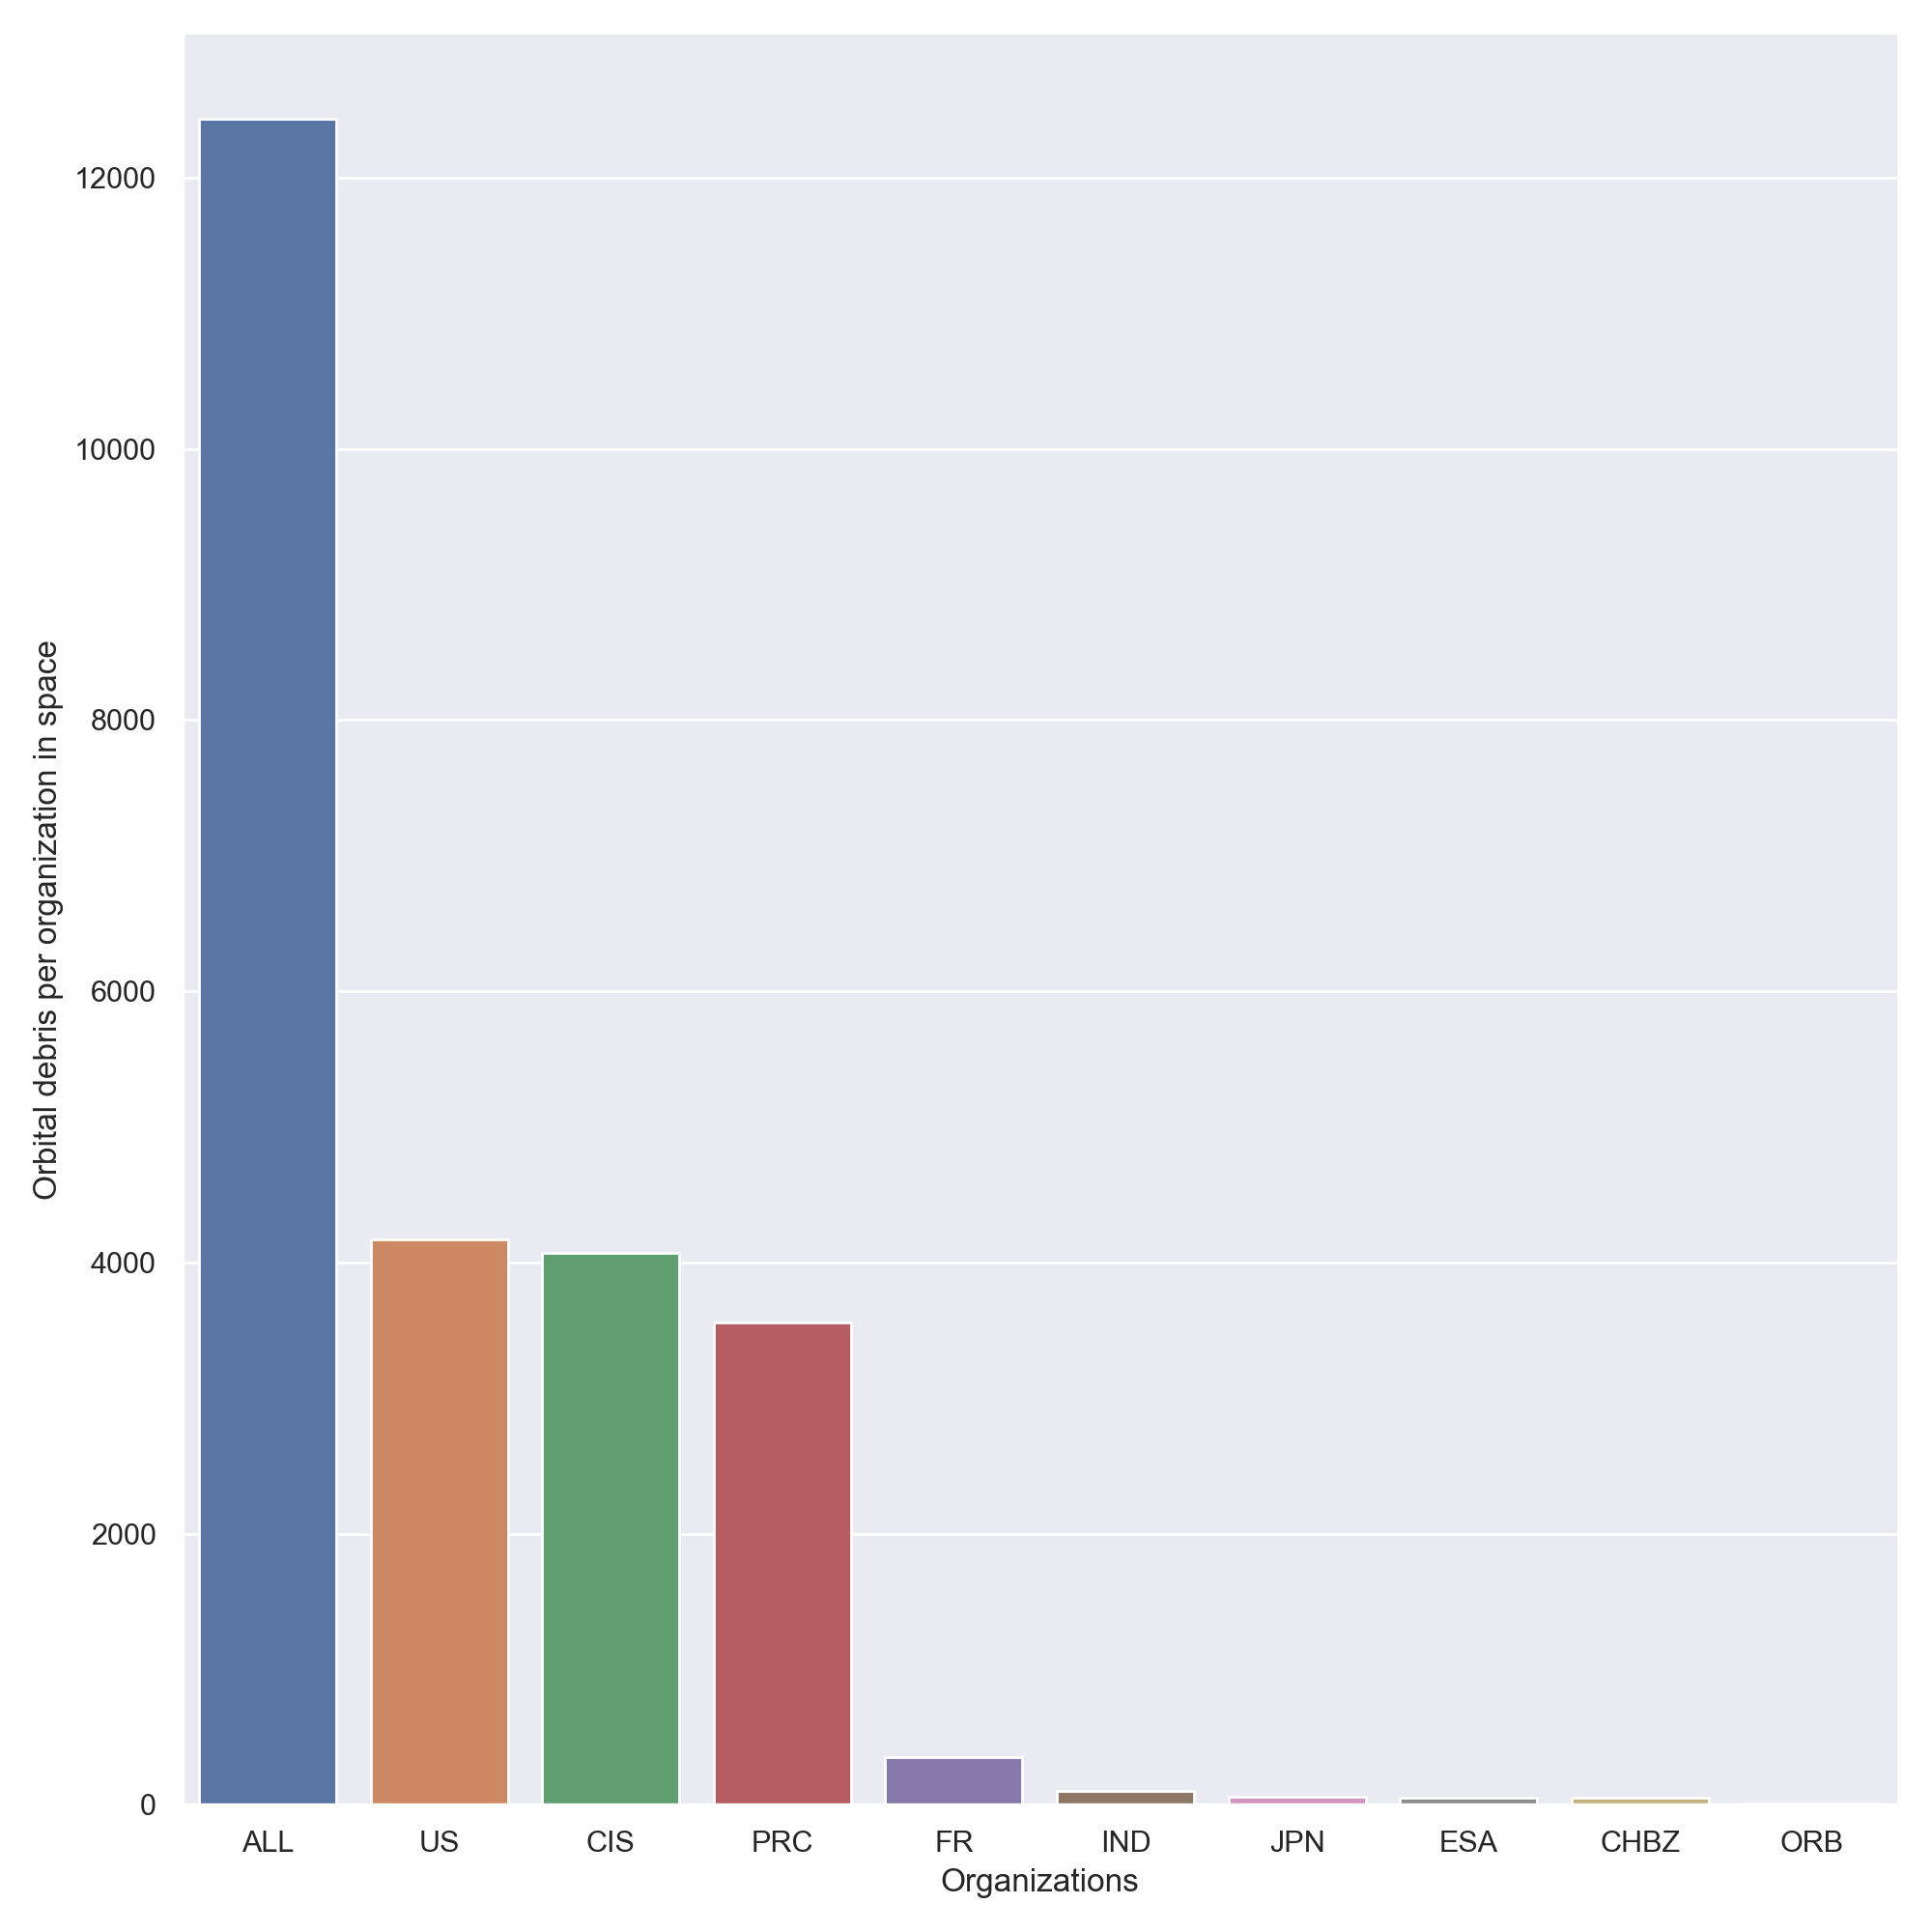

In [72]:
cats = list(dfbox.spadoc_cd.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfbox.groupby('spadoc_cd').get_group(x).orbital_debris_count.values[0])
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
Cat_d = Cat_d.sort_values('Values', ascending = False)
Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Organizations', ylabel='Orbital debris per organization in space')
fig.savefig("Debris.png", format="png")
plt.show()

<Figure size 720x720 with 0 Axes>

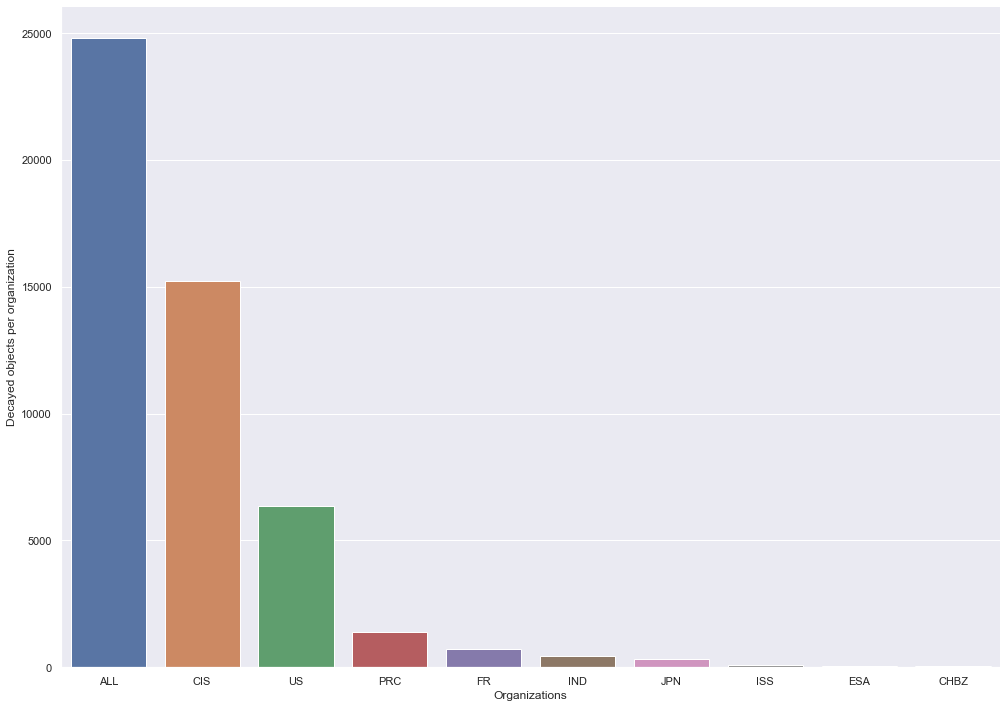

In [55]:
cats = list(dfbox.spadoc_cd.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfbox.groupby('spadoc_cd').get_group(x).decayed_total_count.values[0])
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
Cat_d = Cat_d.sort_values('Values', ascending = False)
Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Organizations', ylabel='Decayed objects per organization')
fig.savefig("Decay.png", format="png")
plt.show()

<IPython.core.display.Javascript object>


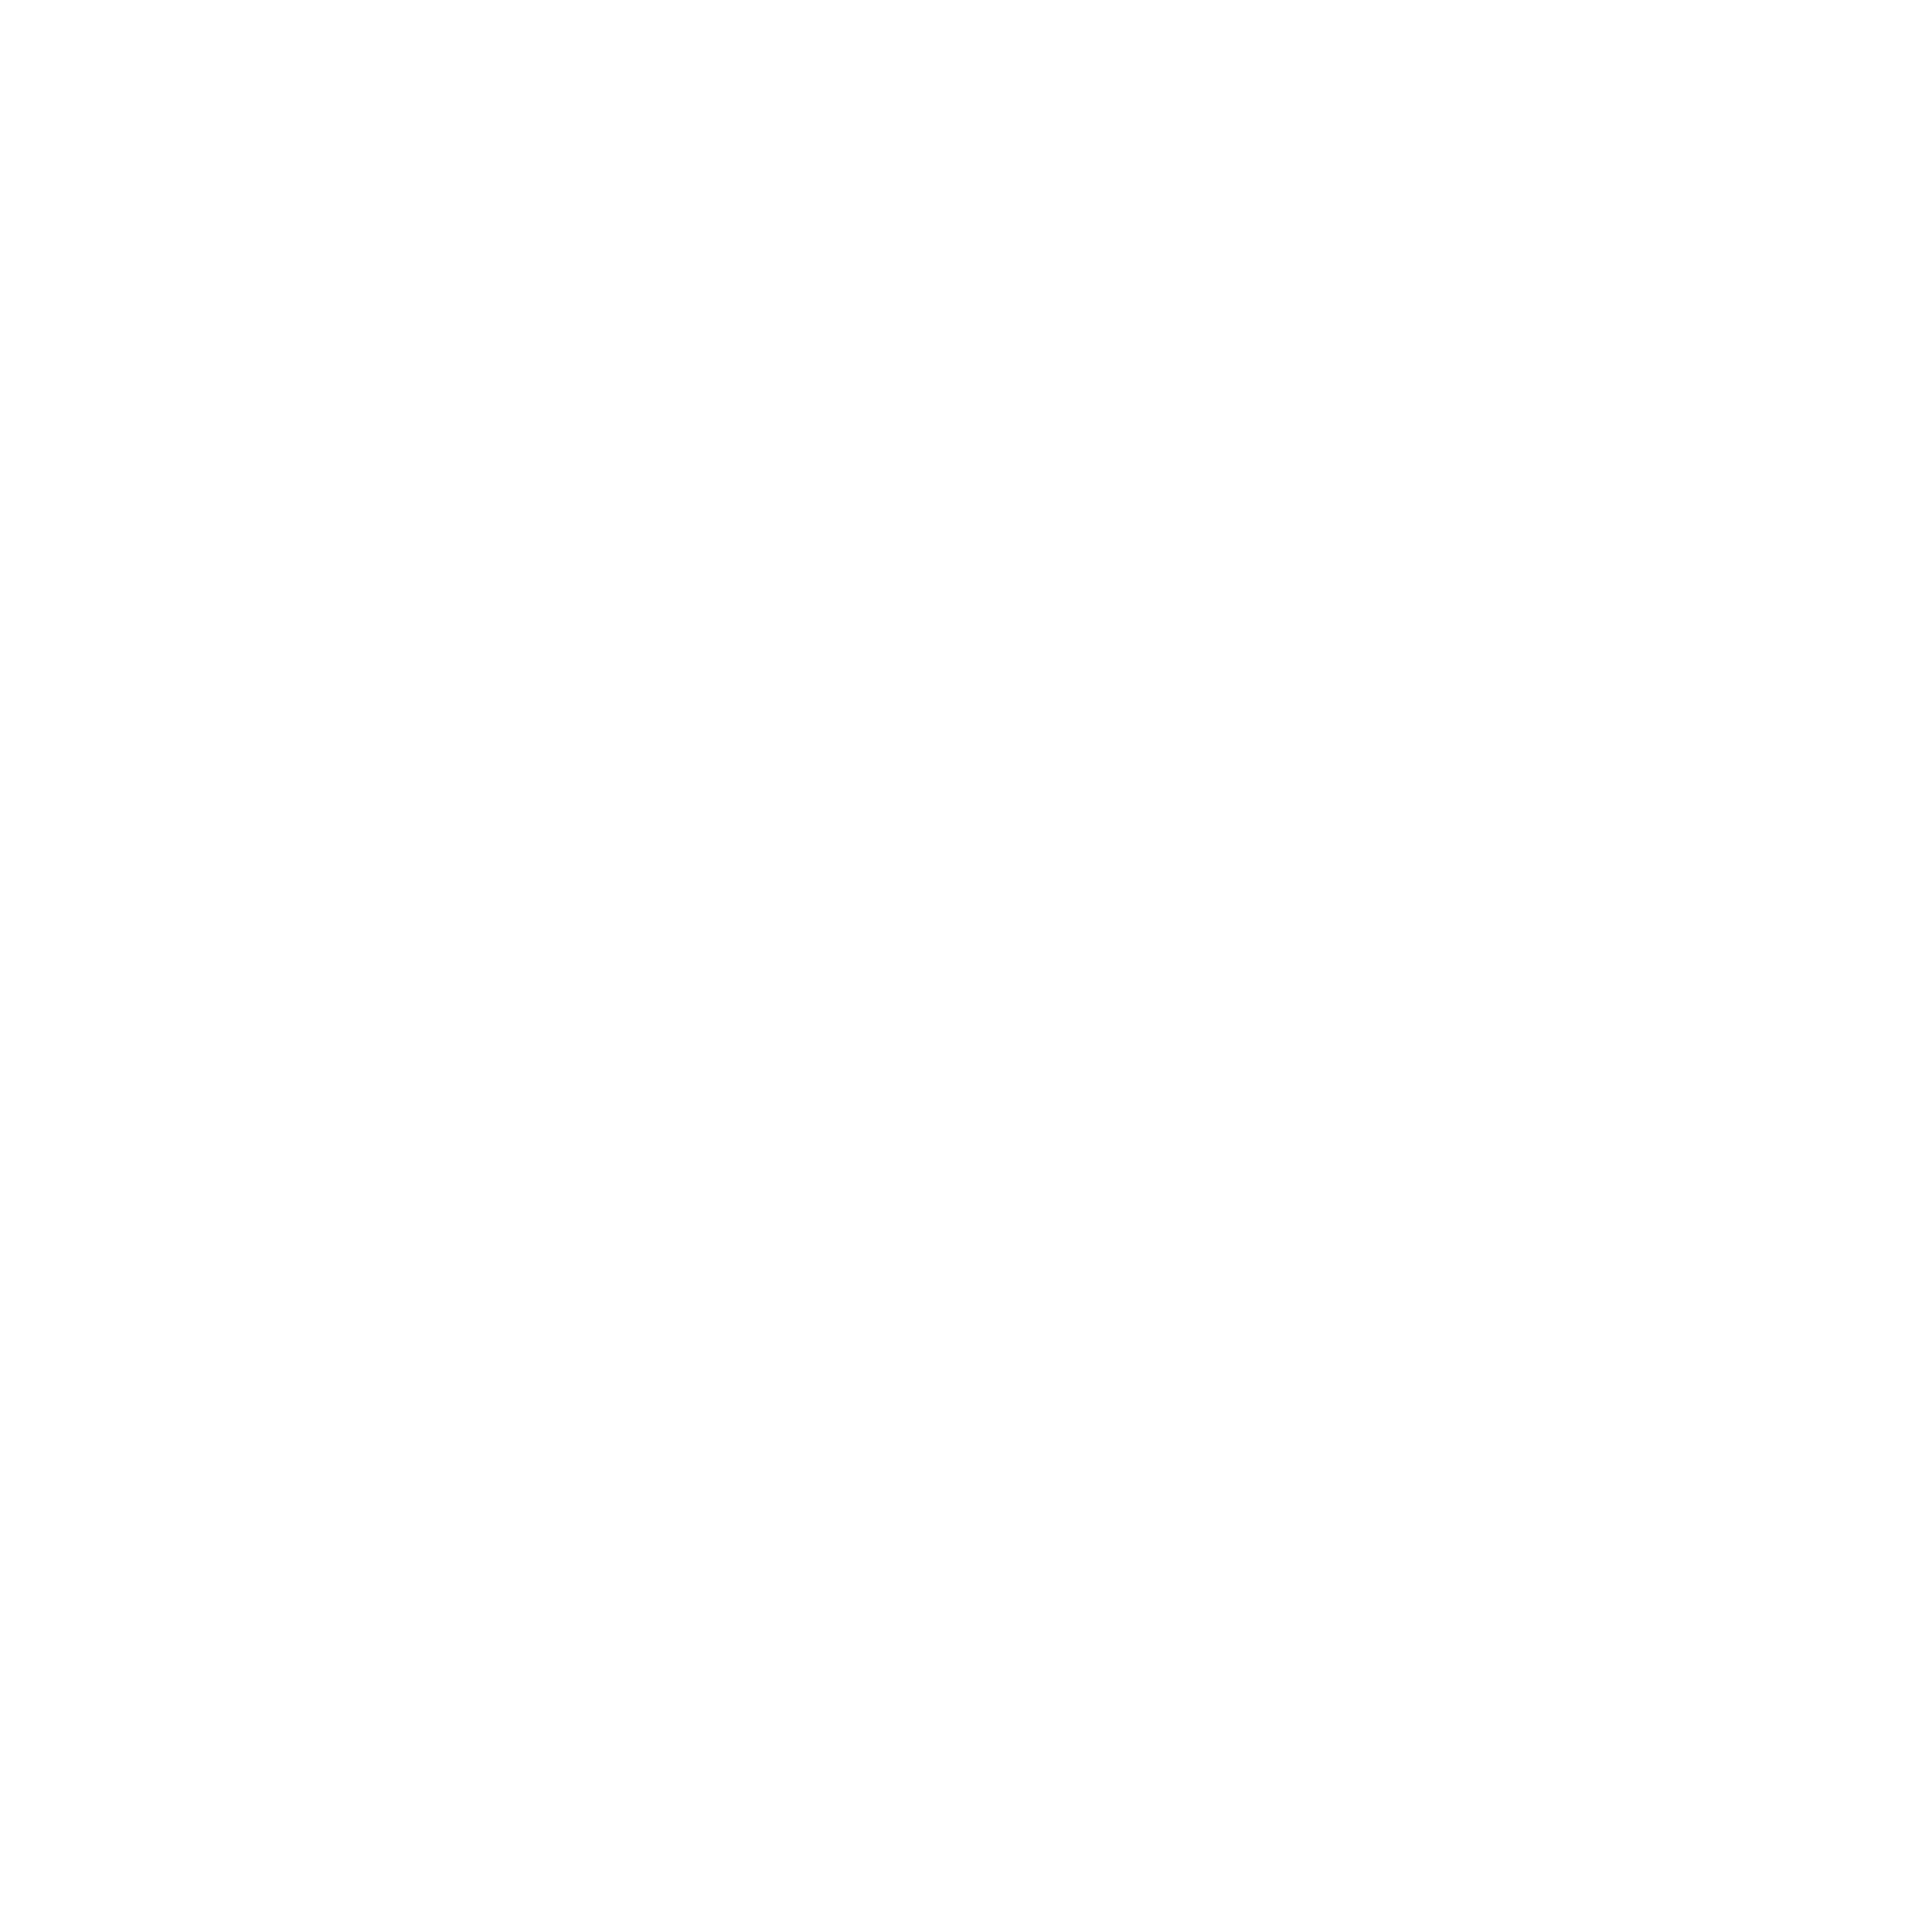

<IPython.core.display.Javascript object>


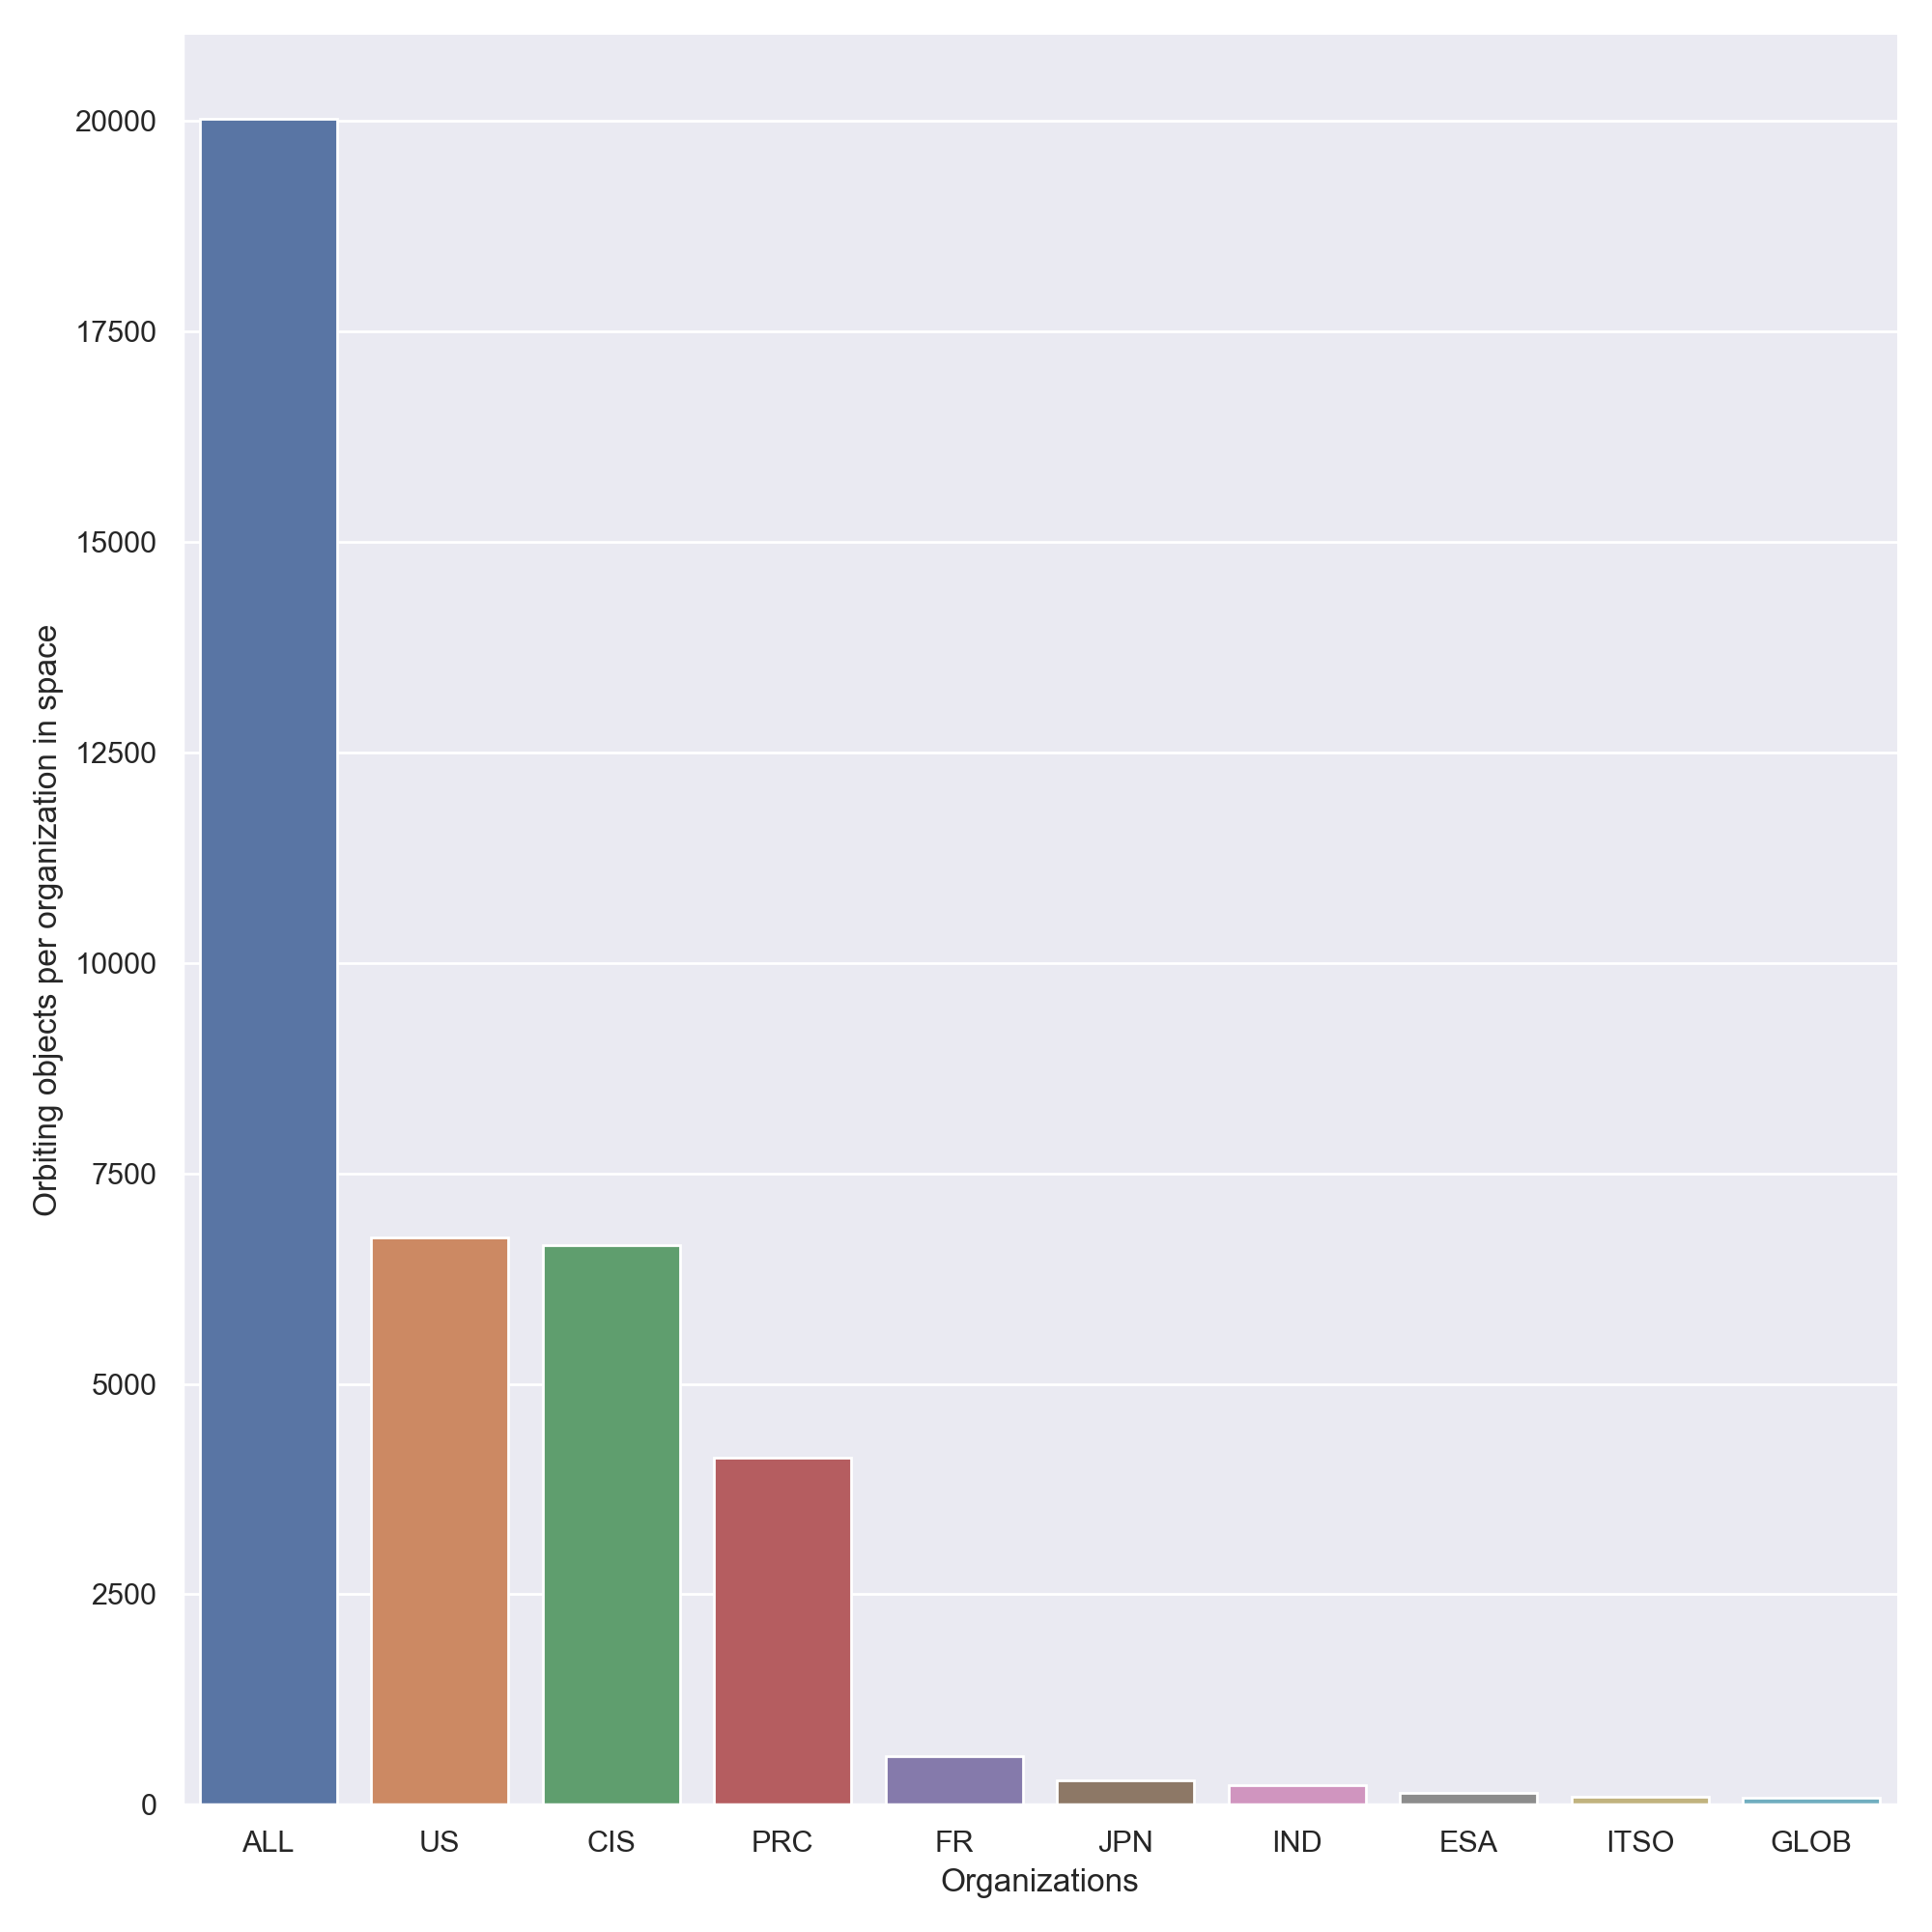

In [73]:
cats = list(dfbox.spadoc_cd.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfbox.groupby('spadoc_cd').get_group(x).orbital_total_count.values[0])
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
Cat_d = Cat_d.sort_values('Values', ascending = False)
Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Organizations', ylabel='Orbiting objects per organization in space')
fig.savefig("Orbti.png", format="png")
plt.show()

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


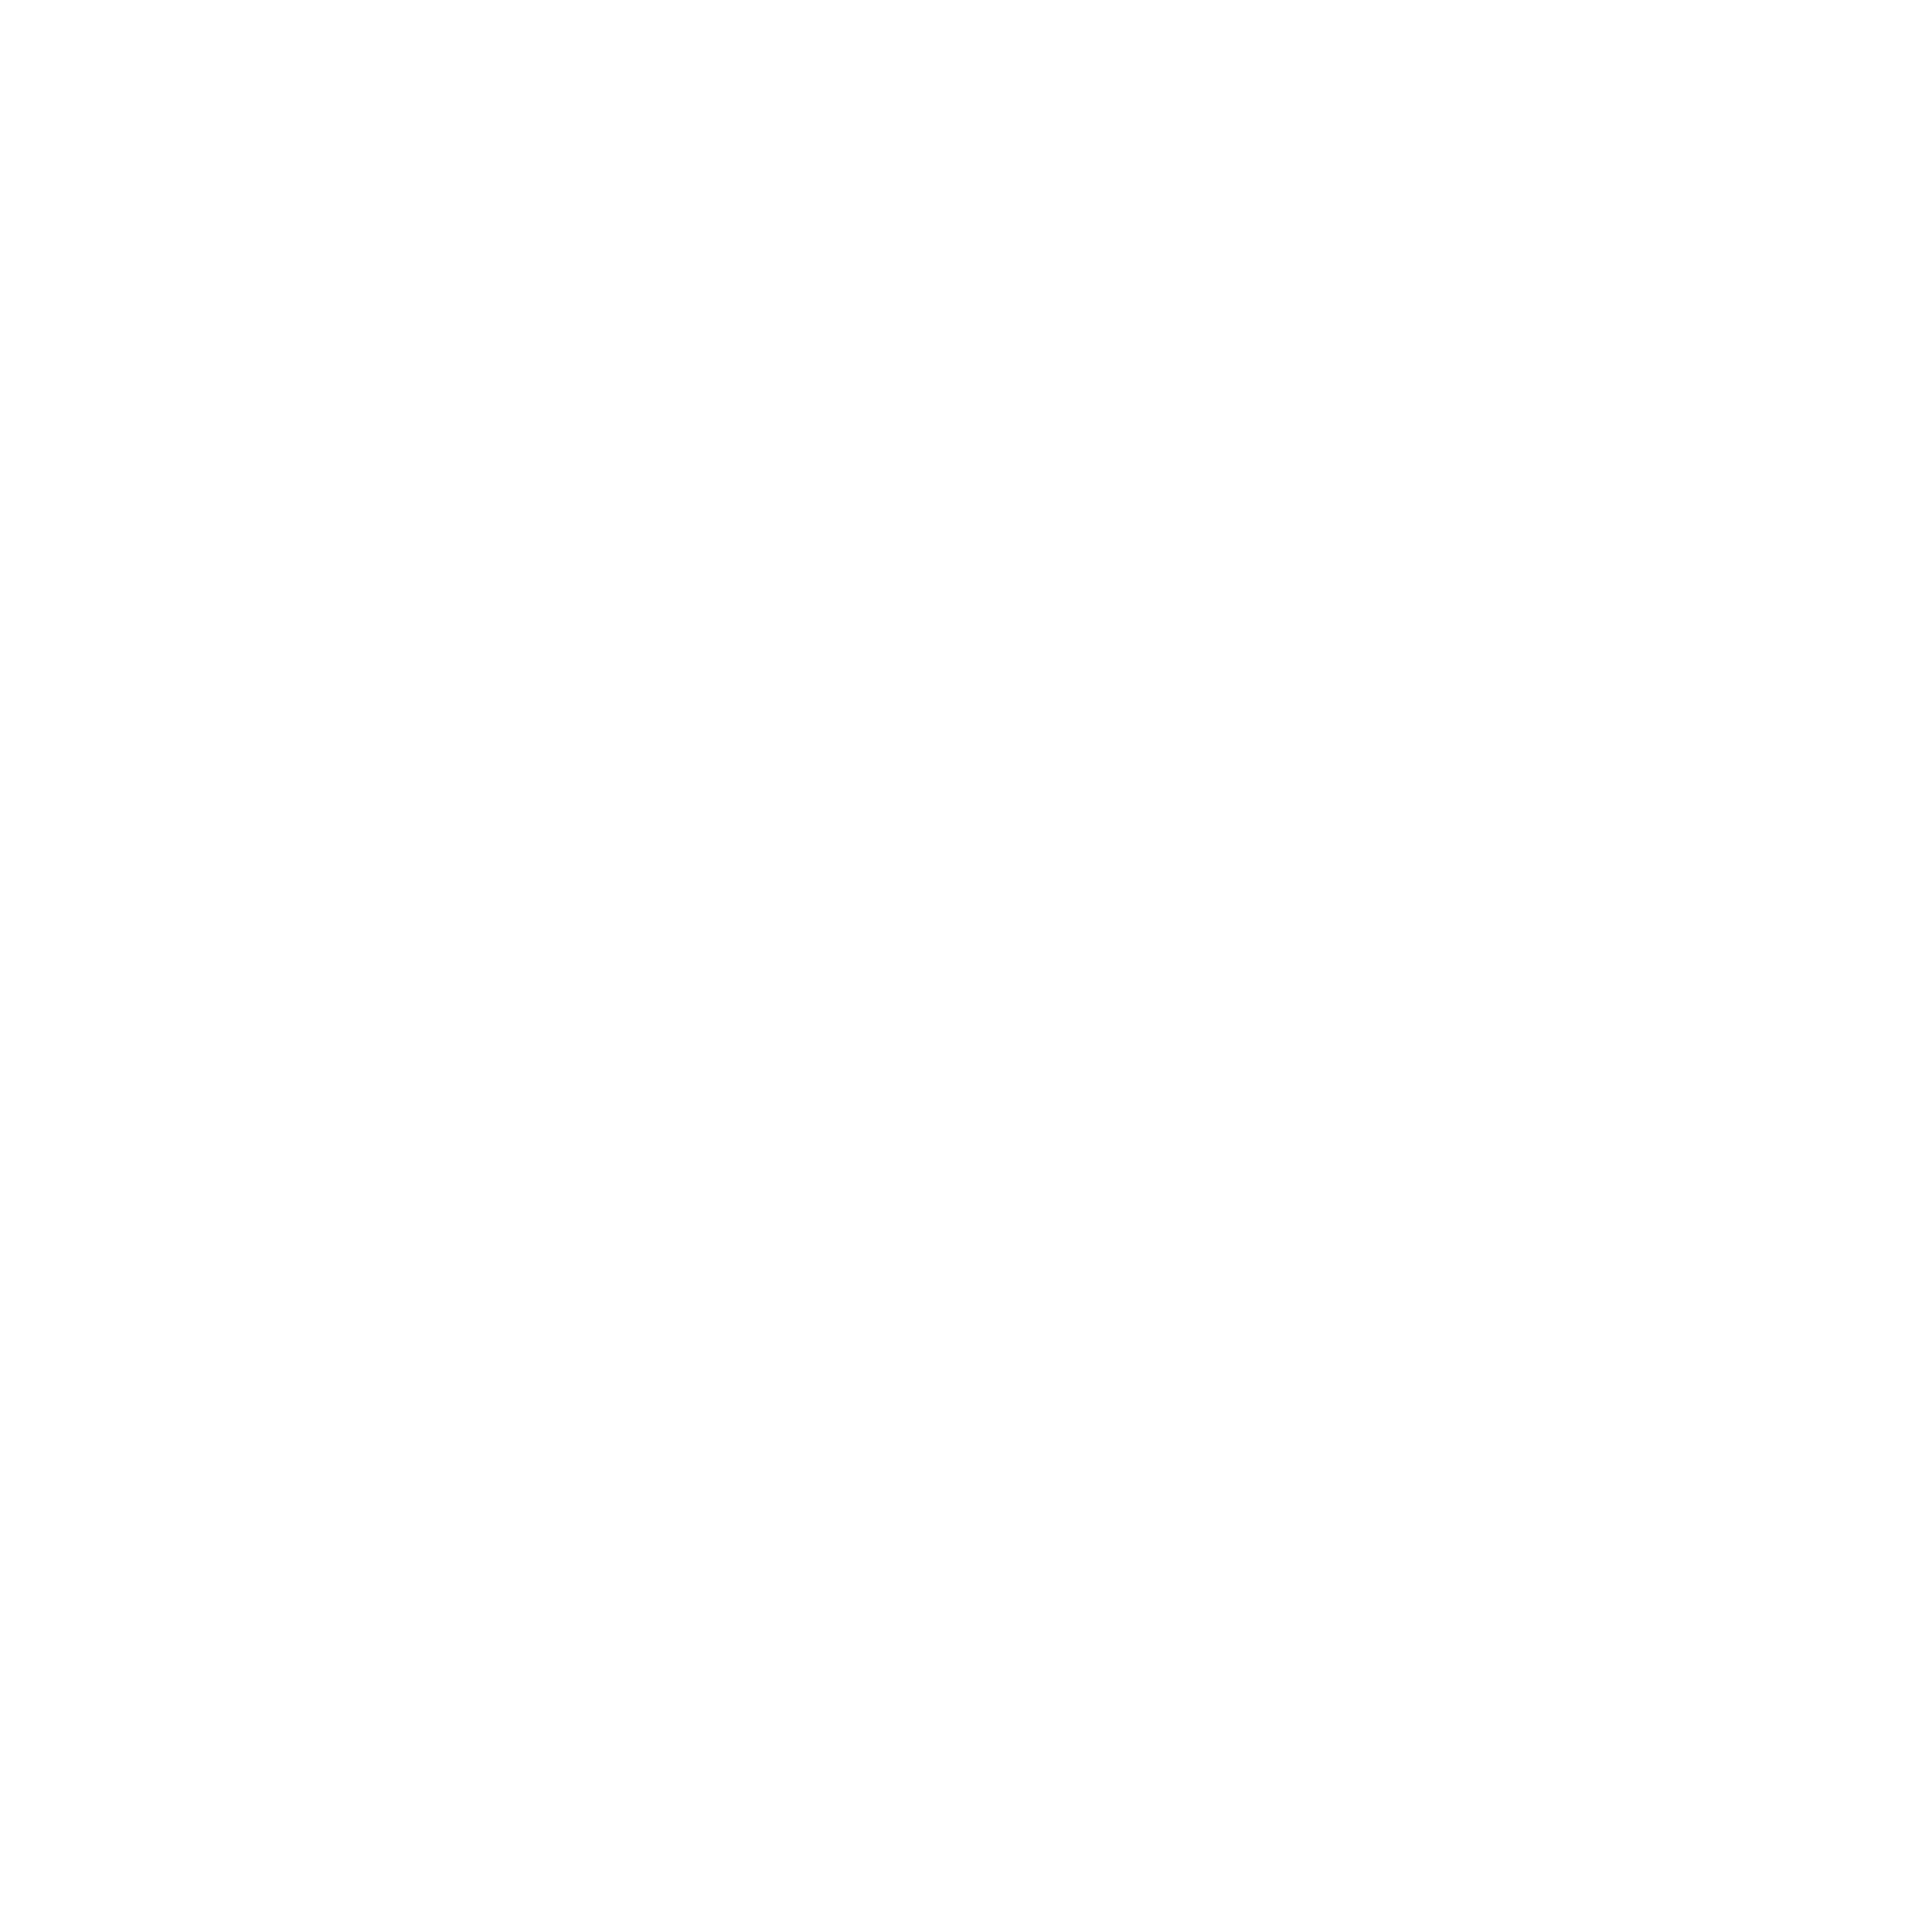

<IPython.core.display.Javascript object>


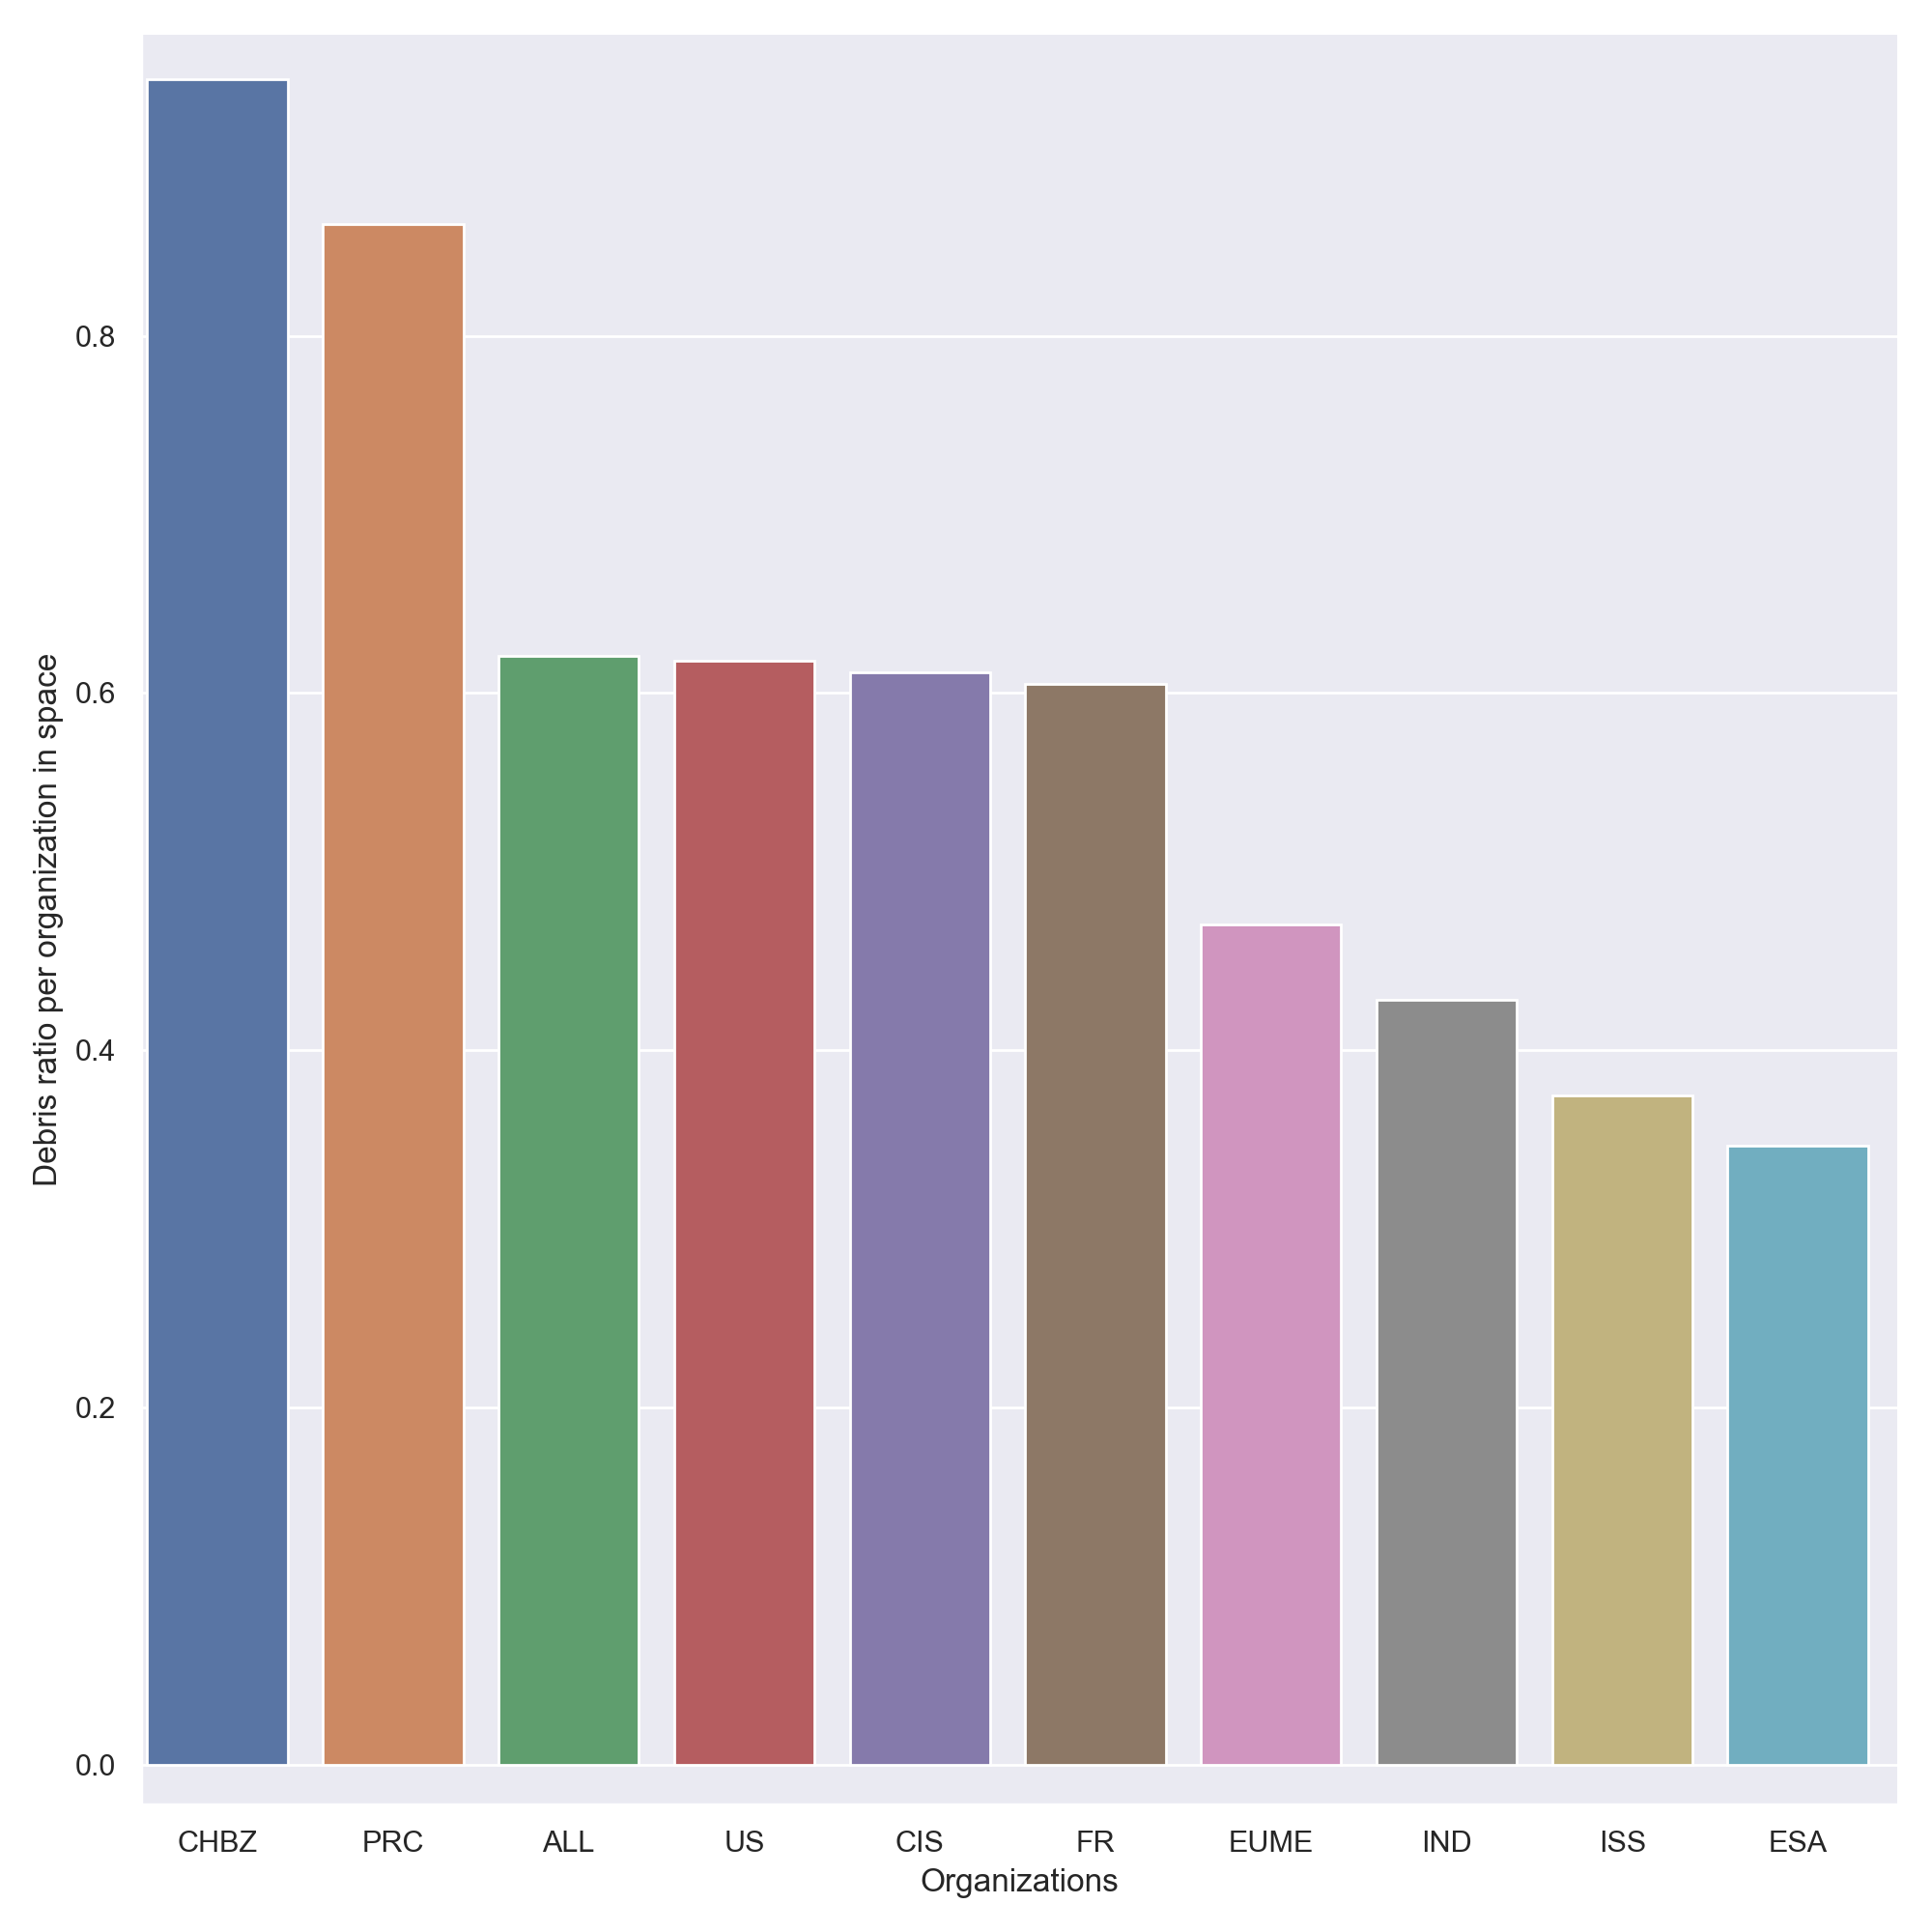

In [76]:
cats = list(dfbox.spadoc_cd.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfbox.groupby('spadoc_cd').get_group(x).orbital_debris_count.values[0]/dfbox.groupby('spadoc_cd').get_group(x).orbital_total_count.values[0])
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
Cat_d = Cat_d.sort_values('Values', ascending = False)
Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Organizations', ylabel='Debris ratio per organization in space')
fig.savefig("Rel_deb.png", format="png")
plt.show()

In [83]:
print(dfbox[dfbox.spadoc_cd == 'EUME'].country.values[0])

EUROPEAN ORGANIZATION FOR THE EXPLOITATION OF METEOROLOGICAL SATELLITES


In [85]:
dfinfotot.columns = dfinfotot.columns.str.lower()

In [91]:
dfinfotot.head()

,apogee,comment,country,decay,inclination,launch,norad_cat_id,object_id,object_name,perigee,period,rcsvalue,rcs_size,debc,year
0,594.0,NaN,PRC,NaN,97.89,2019-11-27,44820,2019-082B,CZ-4C R/B,418.0,94.74,0,LARGE,False,2019
1,629.0,NaN,PRC,NaN,97.93,2019-11-27,44819,2019-082A,GAOFEN 12,628.0,97.28,0,LARGE,False,2019
2,514.0,NaN,TBD,NaN,97.52,2019-11-27,44818,2019-081Q,OBJECT Q,500.0,94.75,0,SMALL,False,2019
3,514.0,NaN,TBD,NaN,97.52,2019-11-27,44817,2019-081P,OBJECT P,499.0,94.75,0,SMALL,False,2019
4,514.0,NaN,TBD,NaN,97.52,2019-11-27,44816,2019-081N,OBJECT N,499.0,94.76,0,SMALL,False,2019


In [131]:
dfinfotot['year'] = dfinfotot.object_id.apply(lambda x: str(x)[:4])
dfinfotot.sort_values('year', inplace = True)
dfprop['year'] = dfprop.object_id.apply(lambda x: str(x)[:4])
dfprop.sort_values('year', inplace = True)
dfdec['year'] = dfdec.object_id.apply(lambda x: str(x)[:4])
dfdec.sort_values('year', inplace = True)

In [94]:
dfinfotot.year.unique()

array(['1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

<IPython.core.display.Javascript object>


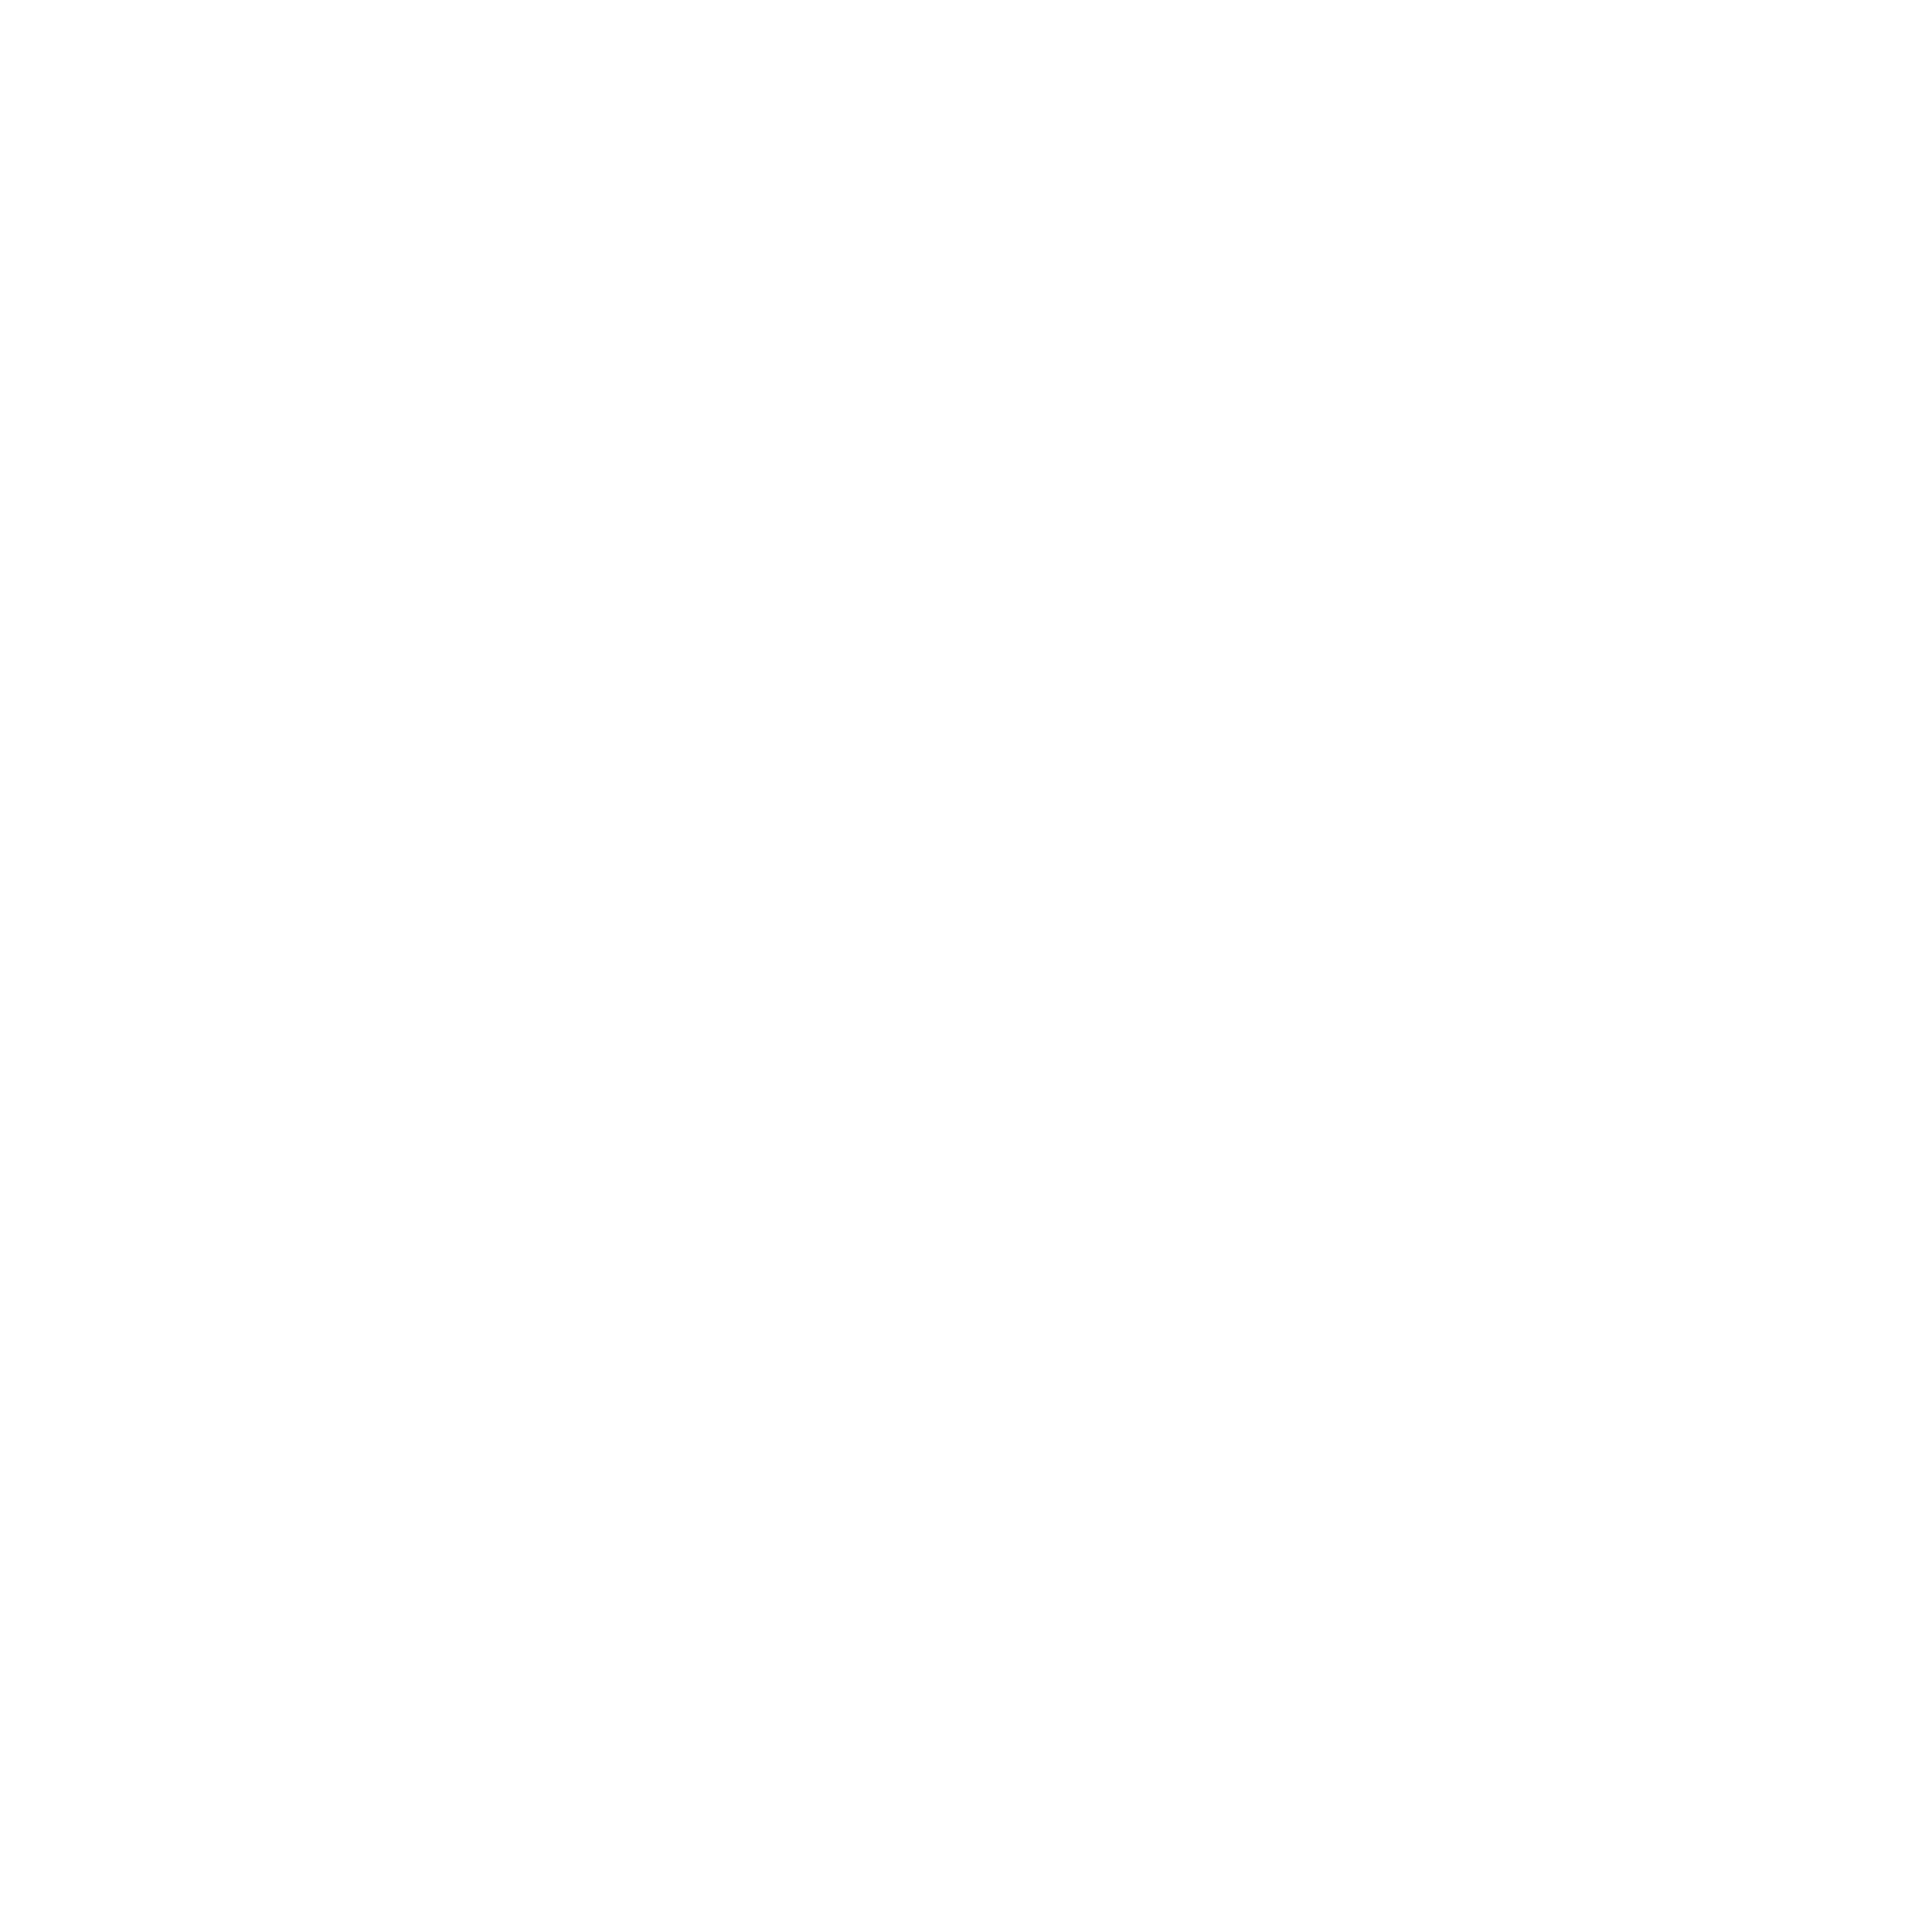

<IPython.core.display.Javascript object>


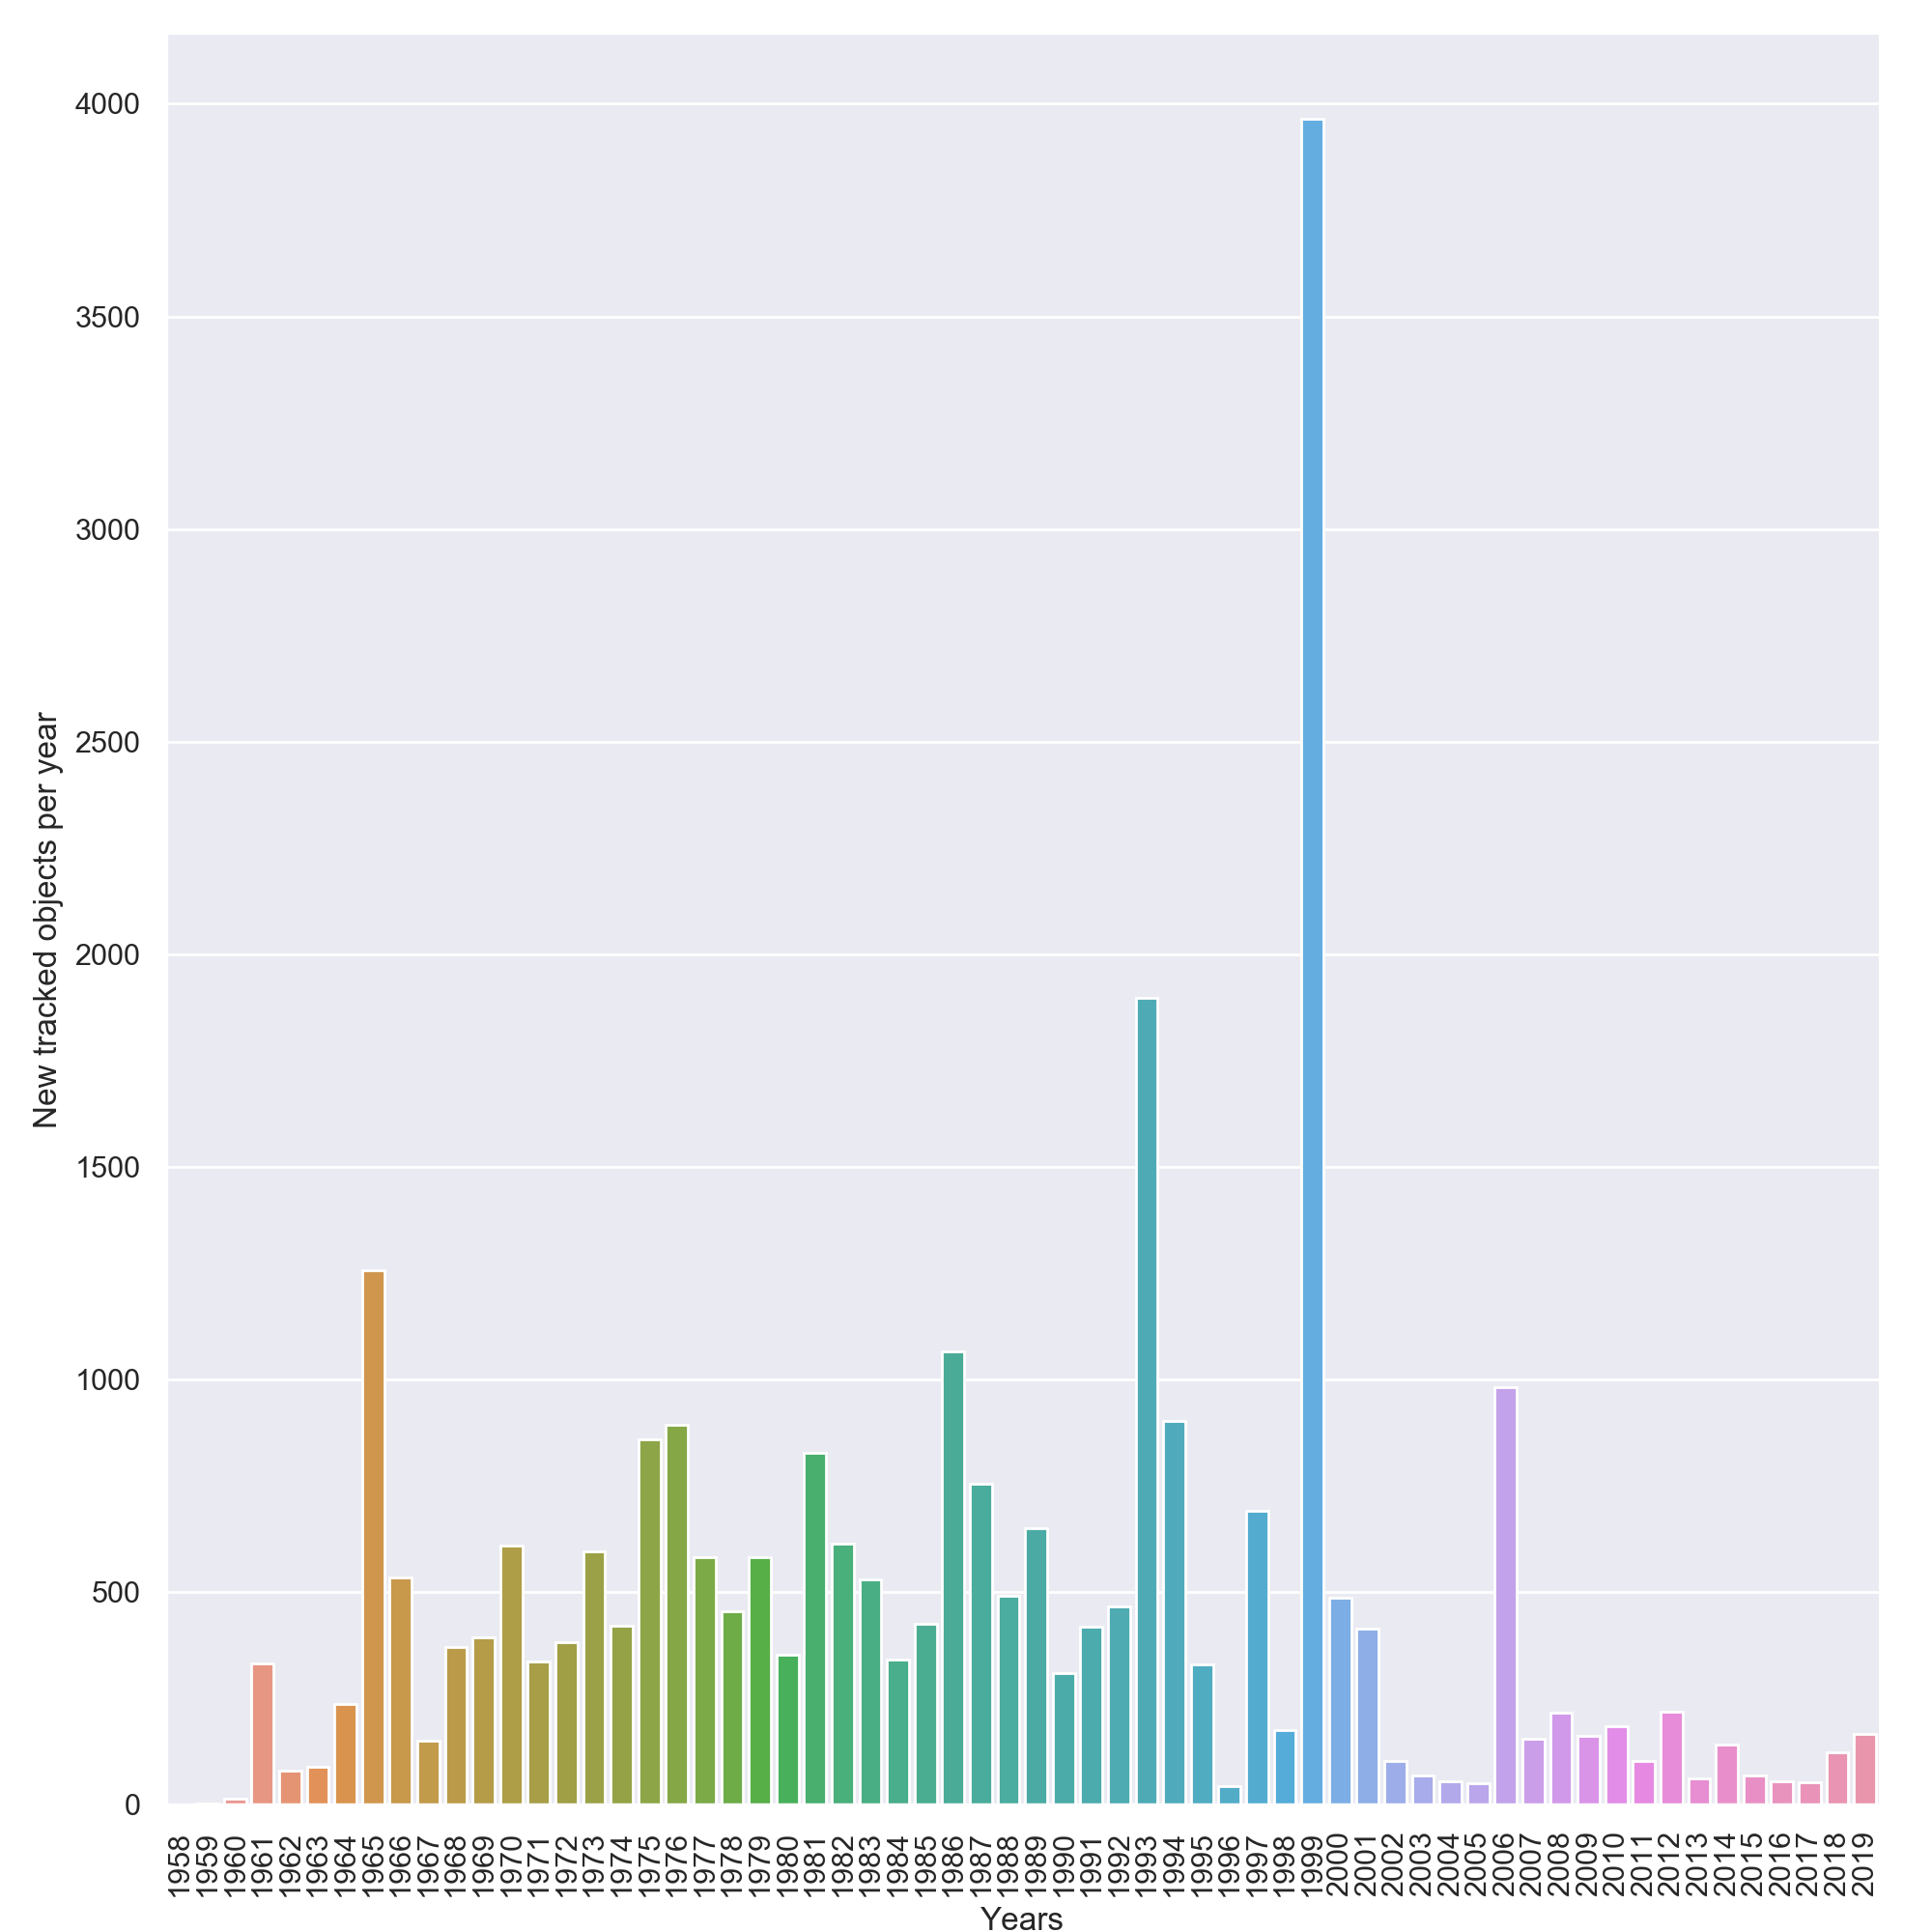

In [132]:
#cats = list(dfinfotot.year.apply(lambda x: str(x)[2:4]).unique())
cats = list(dfinfotot[dfinfotot.debc == 'True'].year.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfinfotot[dfinfotot.debc == 'True'].groupby('year').get_group(x).launch.count())
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
#Cat_d = Cat_d.sort_values('Values', ascending = False)
#Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Years', ylabel='New tracked objects per year')
plt.xticks(rotation=90)
fig.savefig("Yearly_launches.png", format="png")
plt.show()

In [109]:
dfinfotot[(dfinfotot.year == '1999') & (dfinfotot.debc == 'True')].count()

apogee          3954
comment           11
country         3965
decay            914
inclination     3954
launch          3965
norad_cat_id    3965
object_id       3965
object_name     3965
perigee         3954
period          3954
rcsvalue        3965
rcs_size        3944
debc            3965
year            3965
dtype: int64

<IPython.core.display.Javascript object>


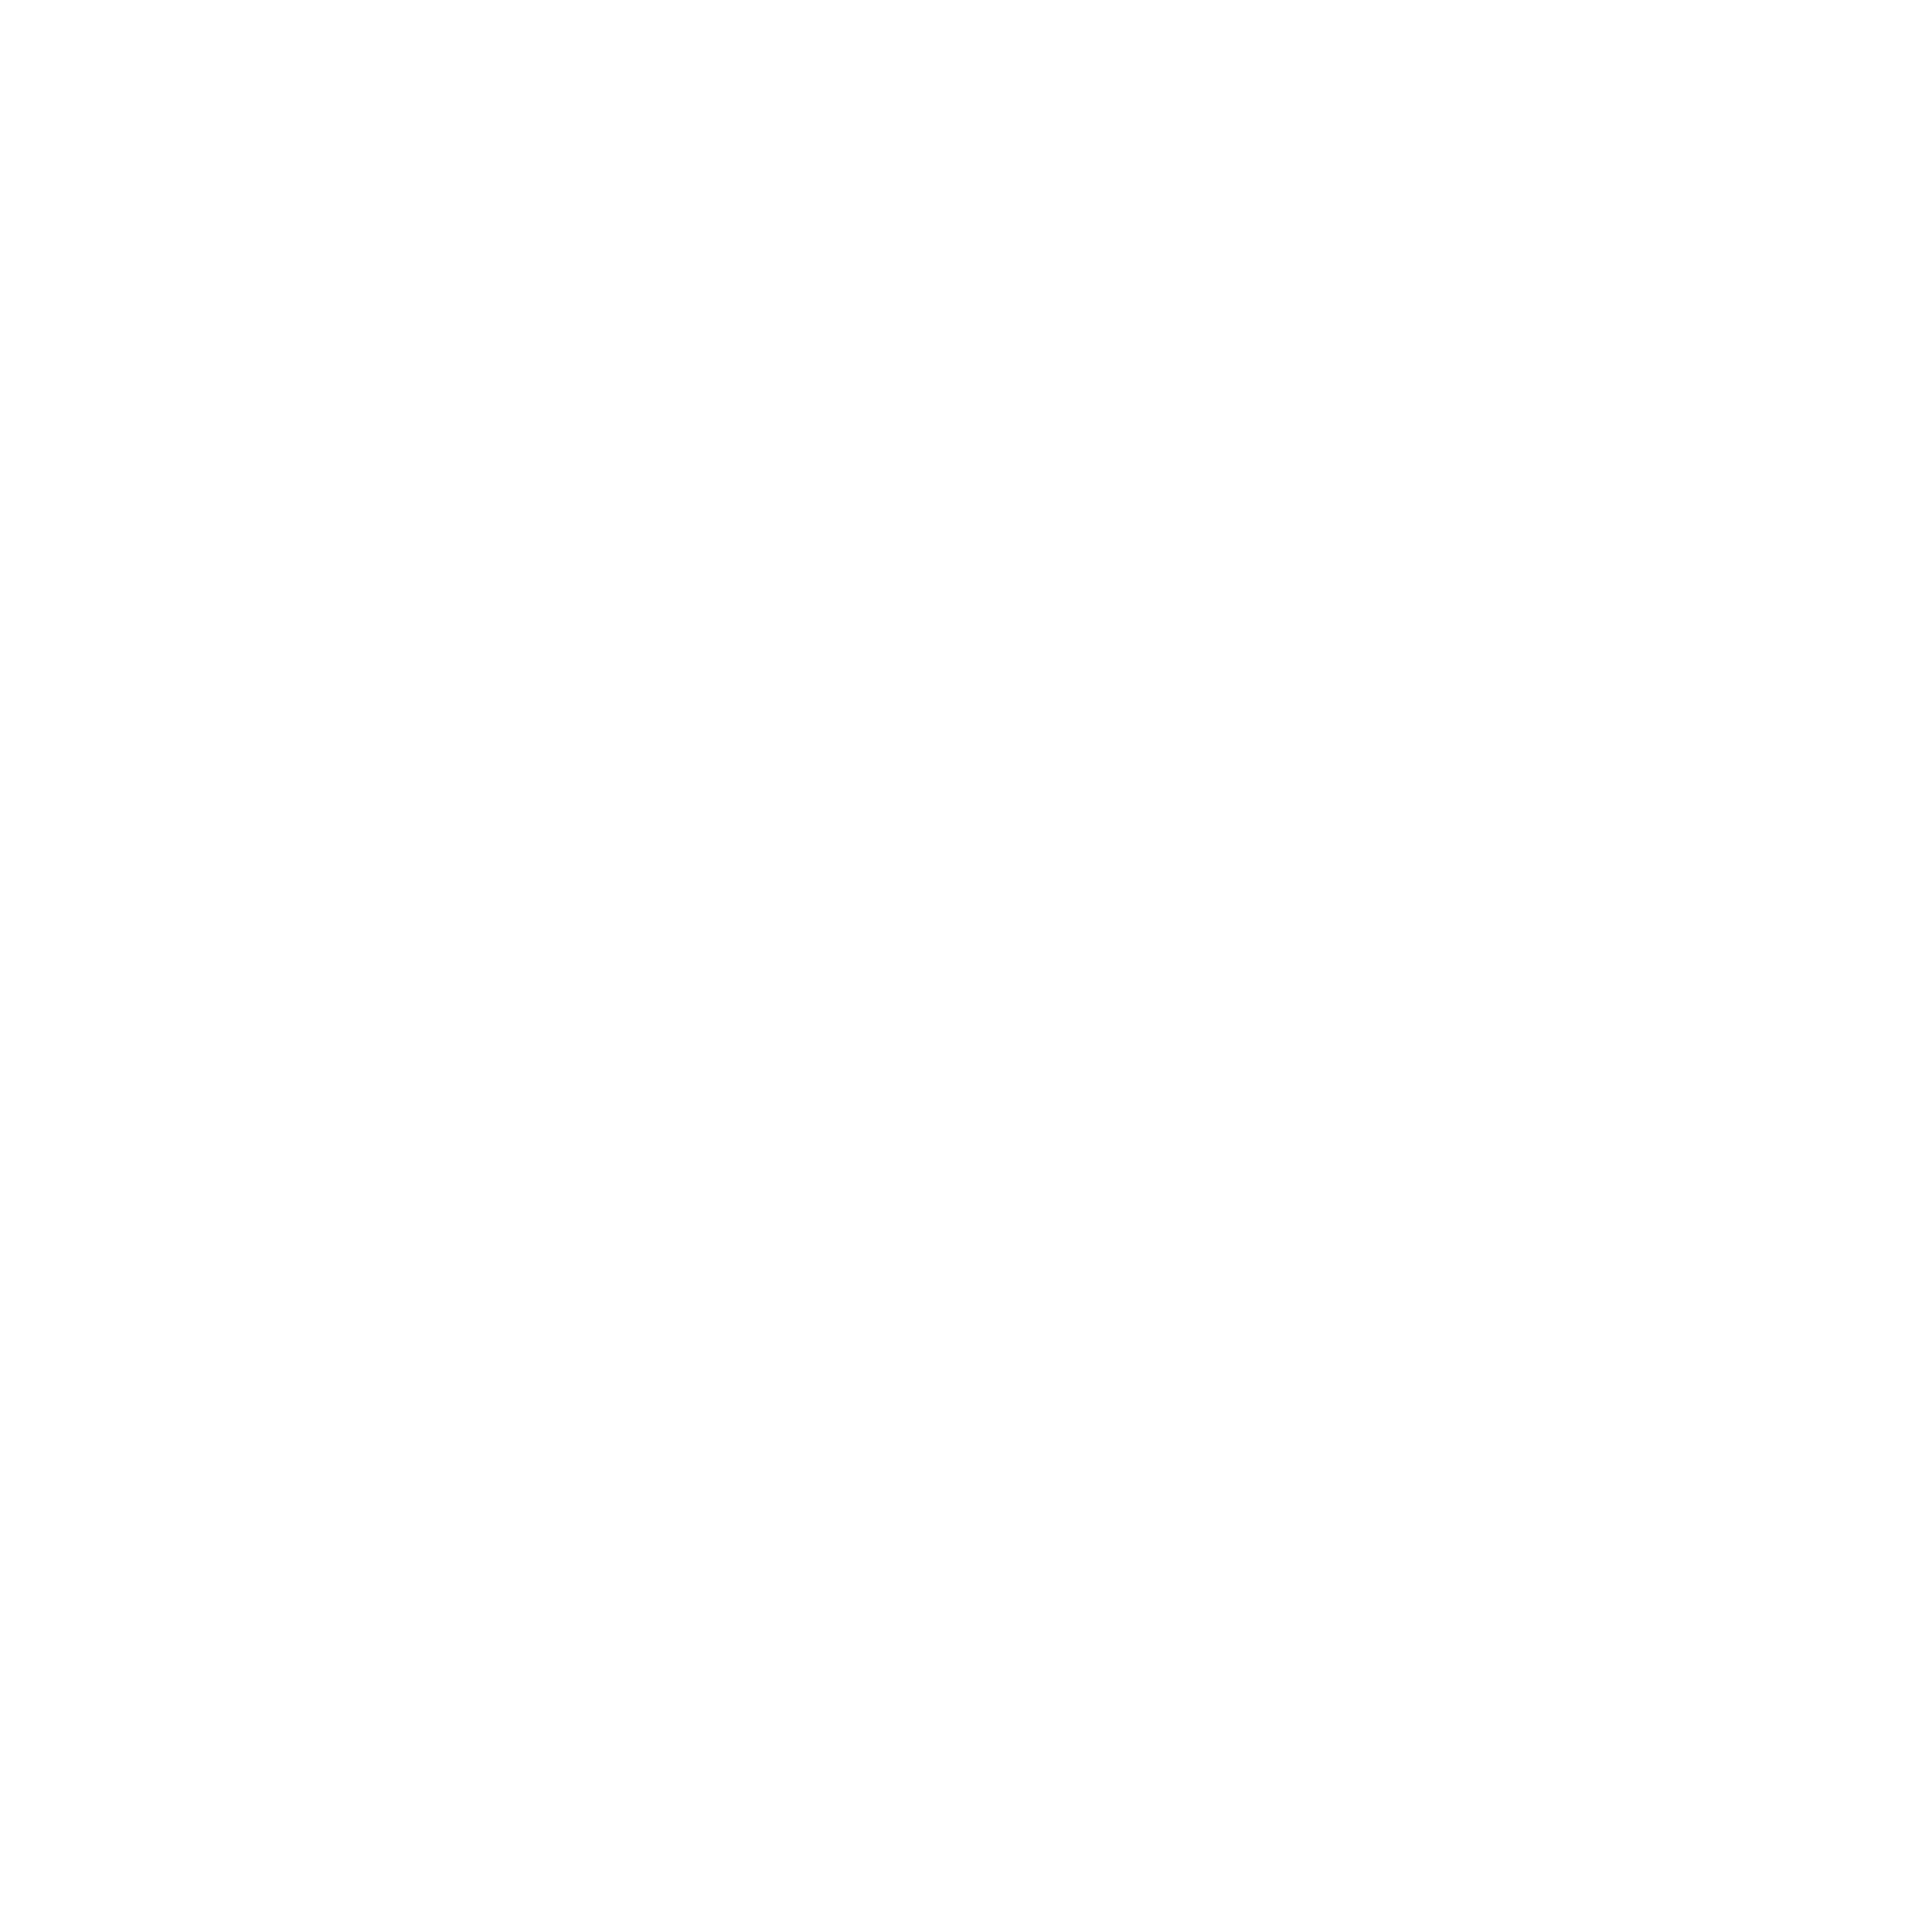

<IPython.core.display.Javascript object>


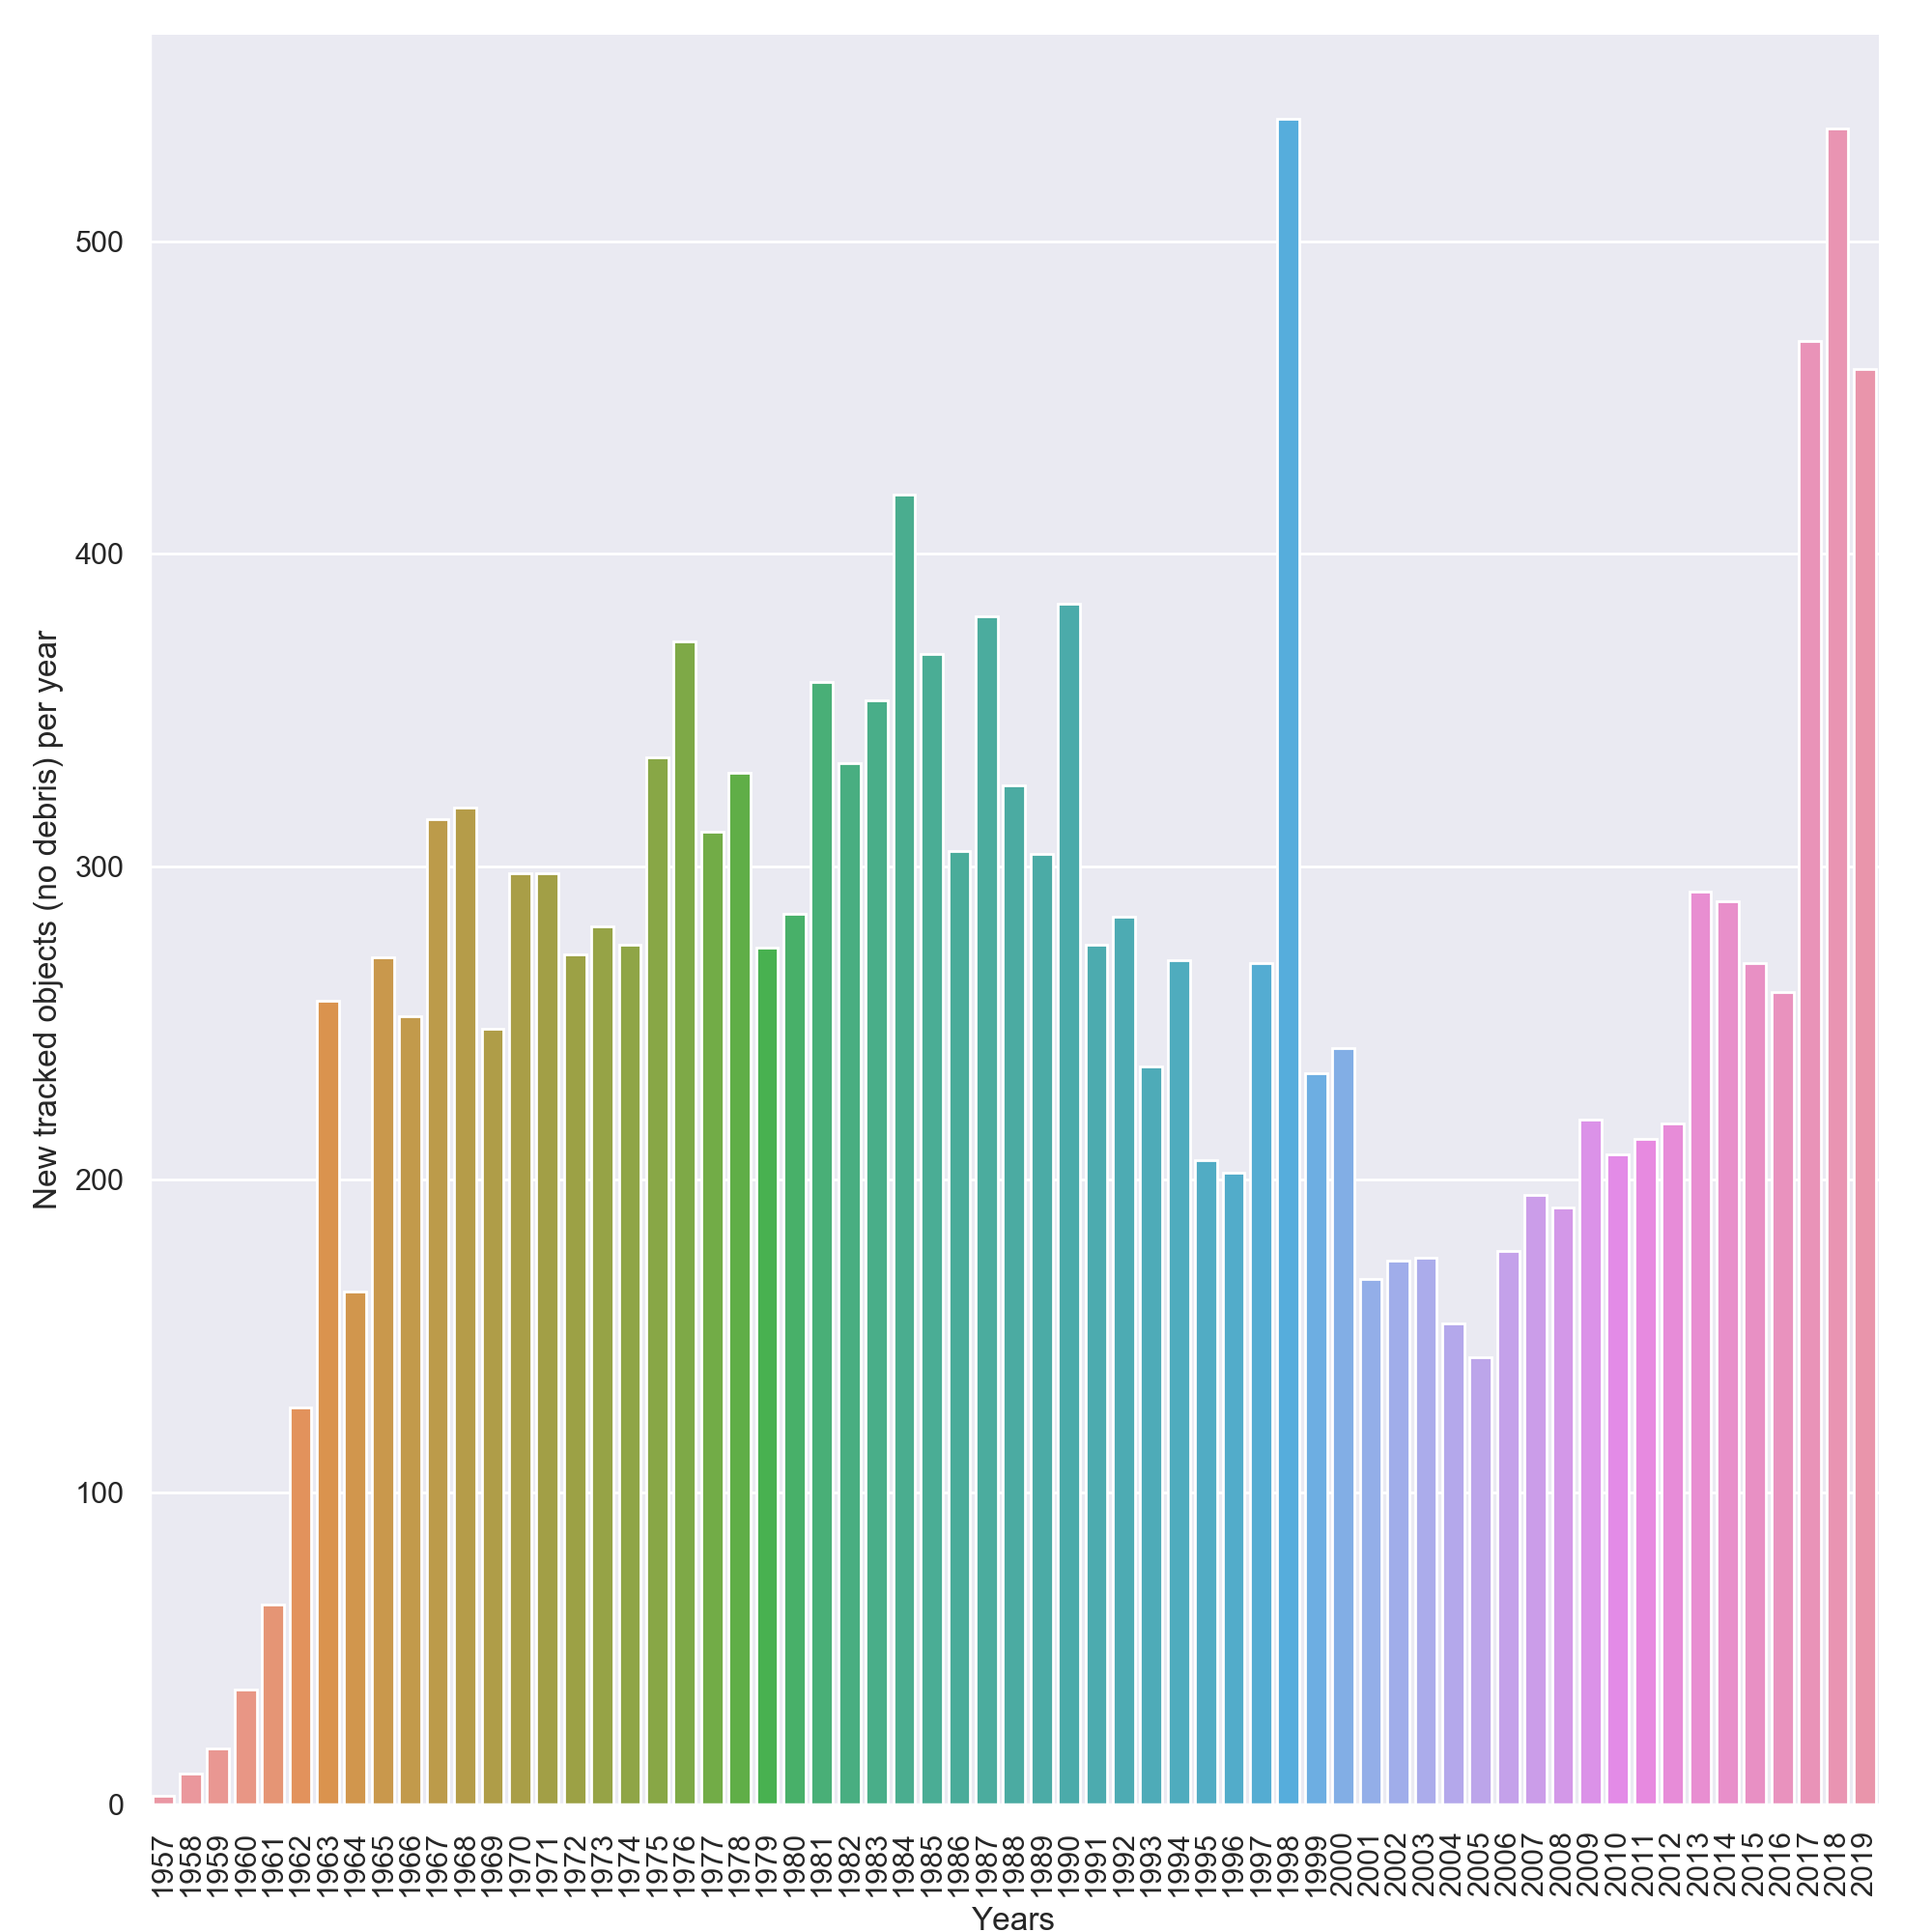

In [133]:
#cats = list(dfinfotot.year.apply(lambda x: str(x)[2:4]).unique())
cats = list(dfinfotot[dfinfotot.debc == 'False'].year.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfinfotot[dfinfotot.debc == 'False'].groupby('year').get_group(x).launch.count())
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
#Cat_d = Cat_d.sort_values('Values', ascending = False)
#Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Years', ylabel='New tracked objects (no debris) per year')
plt.xticks(rotation=90)
fig.savefig("Yearly_launches_notdeb.png", format="png")
plt.show()

In [123]:
dfinfotot.count()

apogee          43937
comment           868
country         44819
decay           24798
inclination     43937
launch          44819
norad_cat_id    44819
object_id       44819
object_name     44819
perigee         43937
period          43937
rcsvalue        44819
rcs_size        34993
debc            44819
year            44819
dtype: int64

<IPython.core.display.Javascript object>


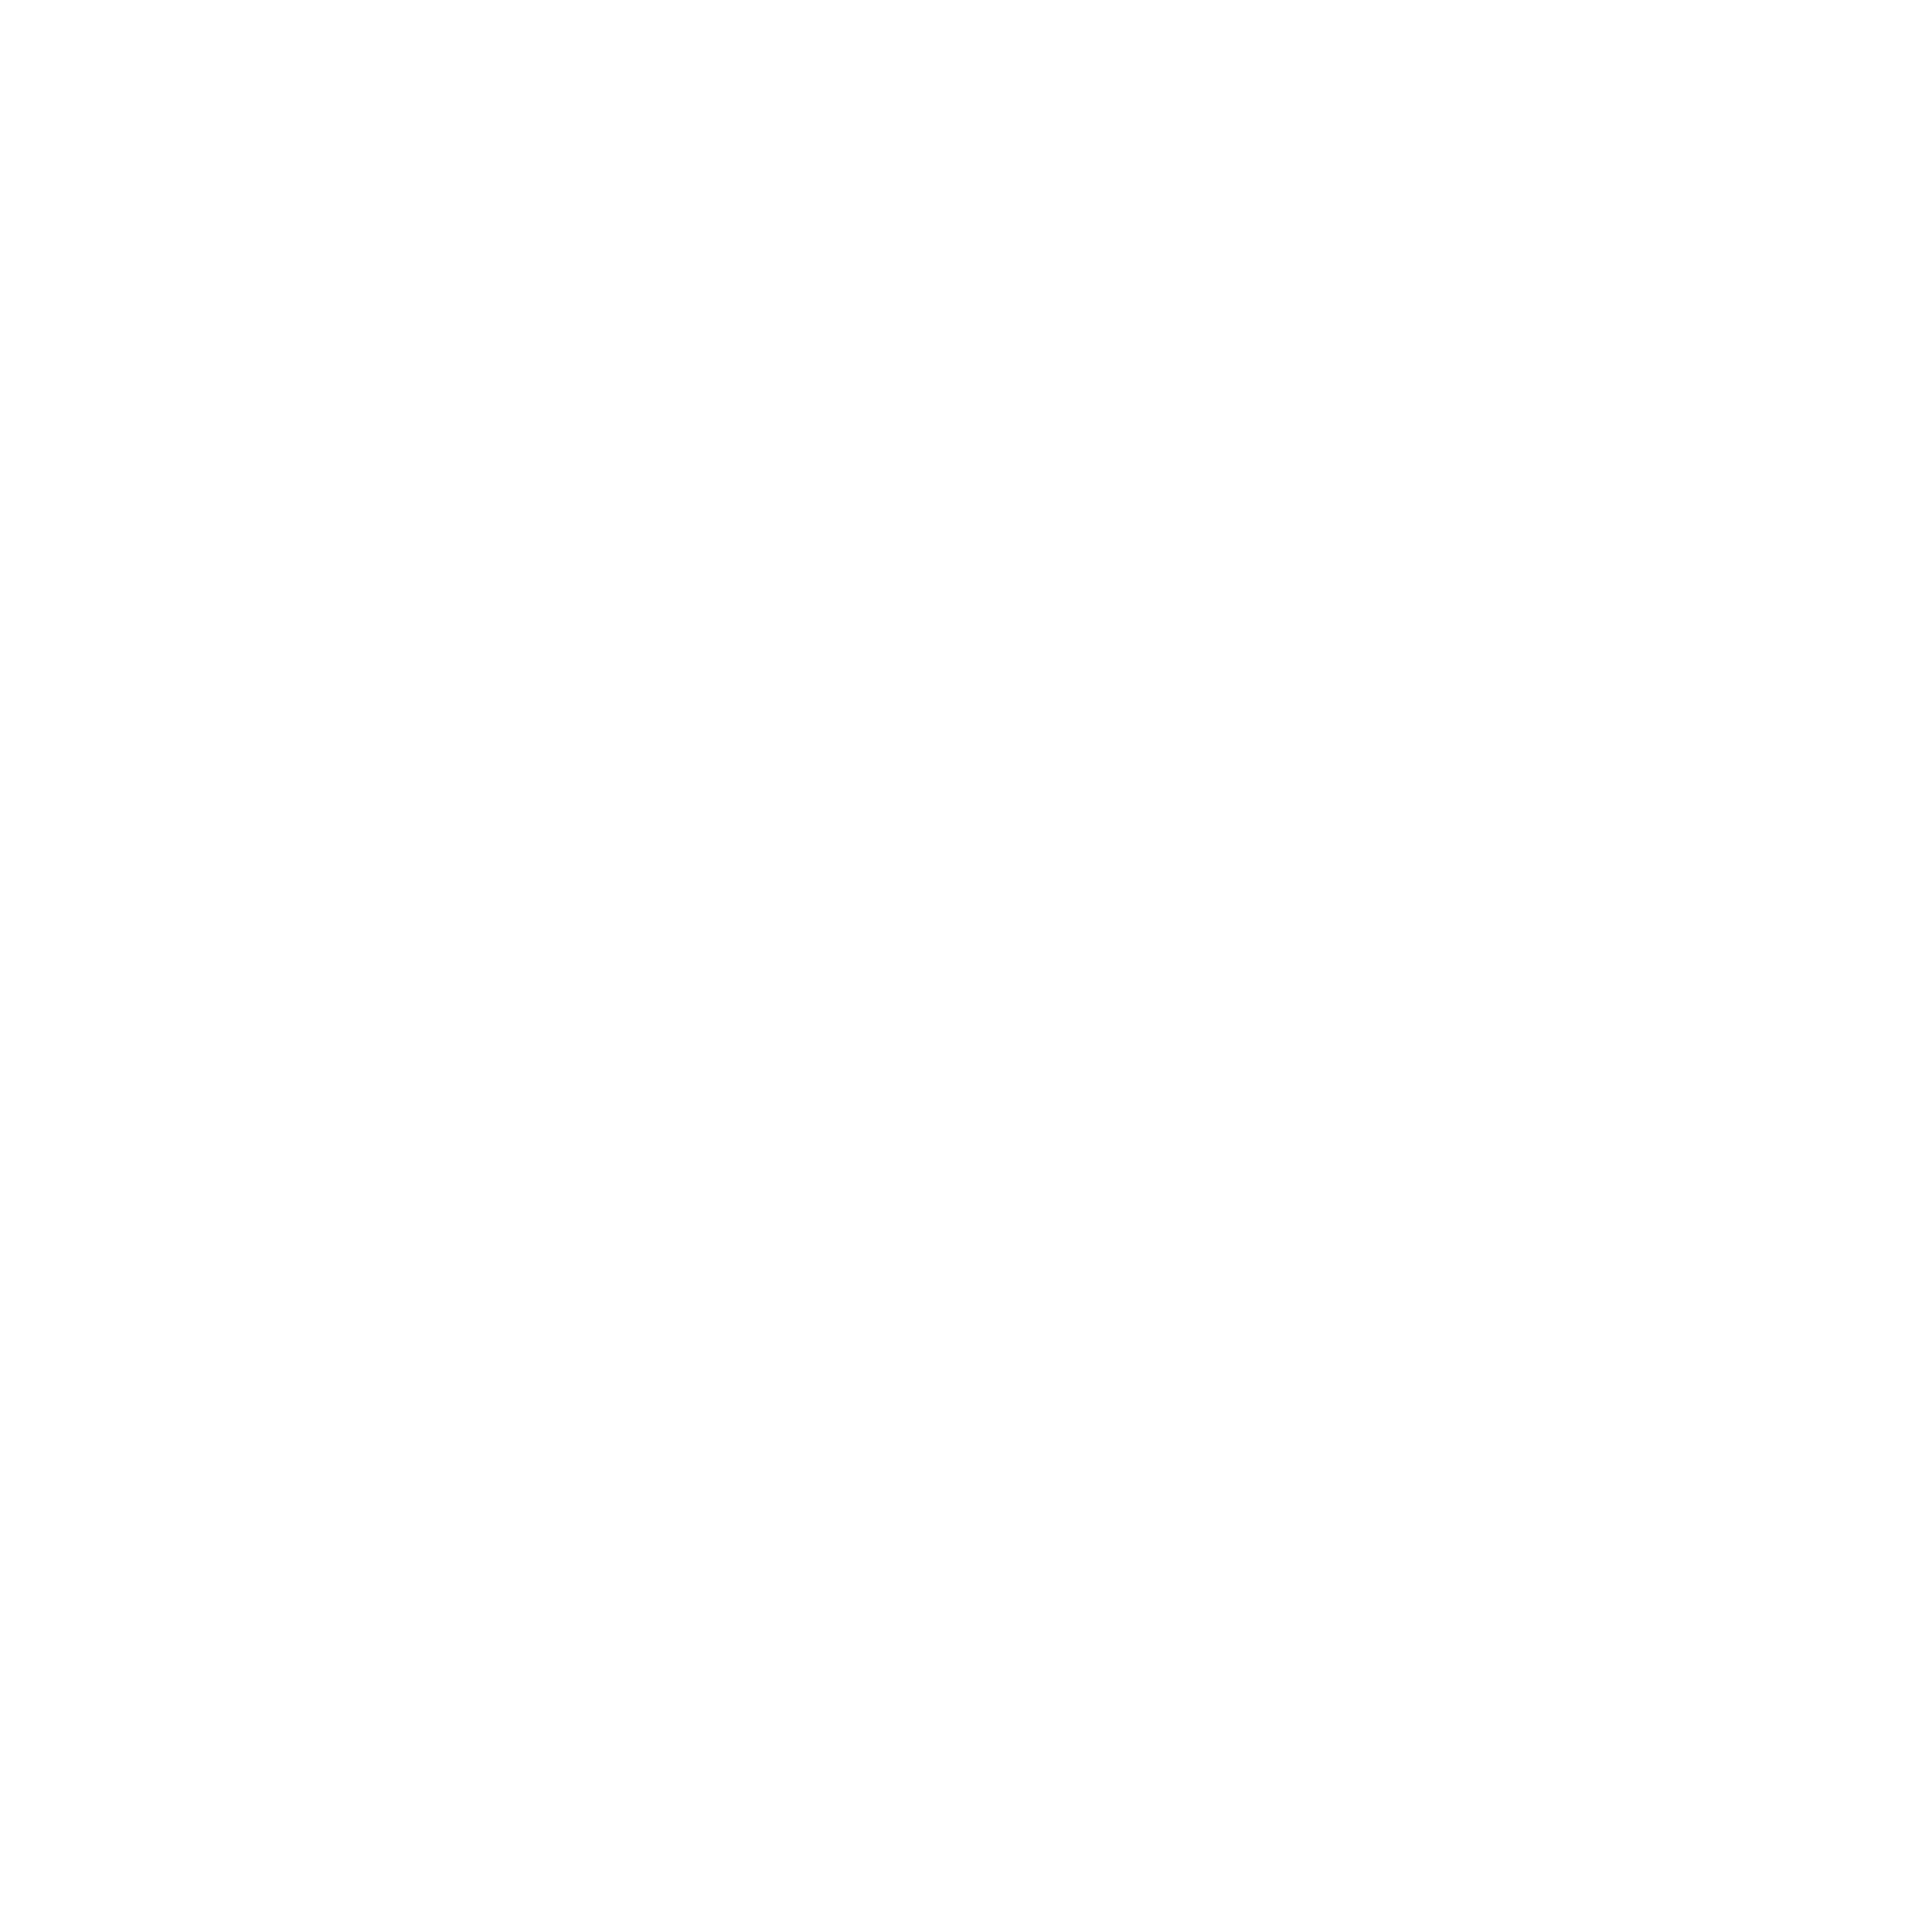

<IPython.core.display.Javascript object>


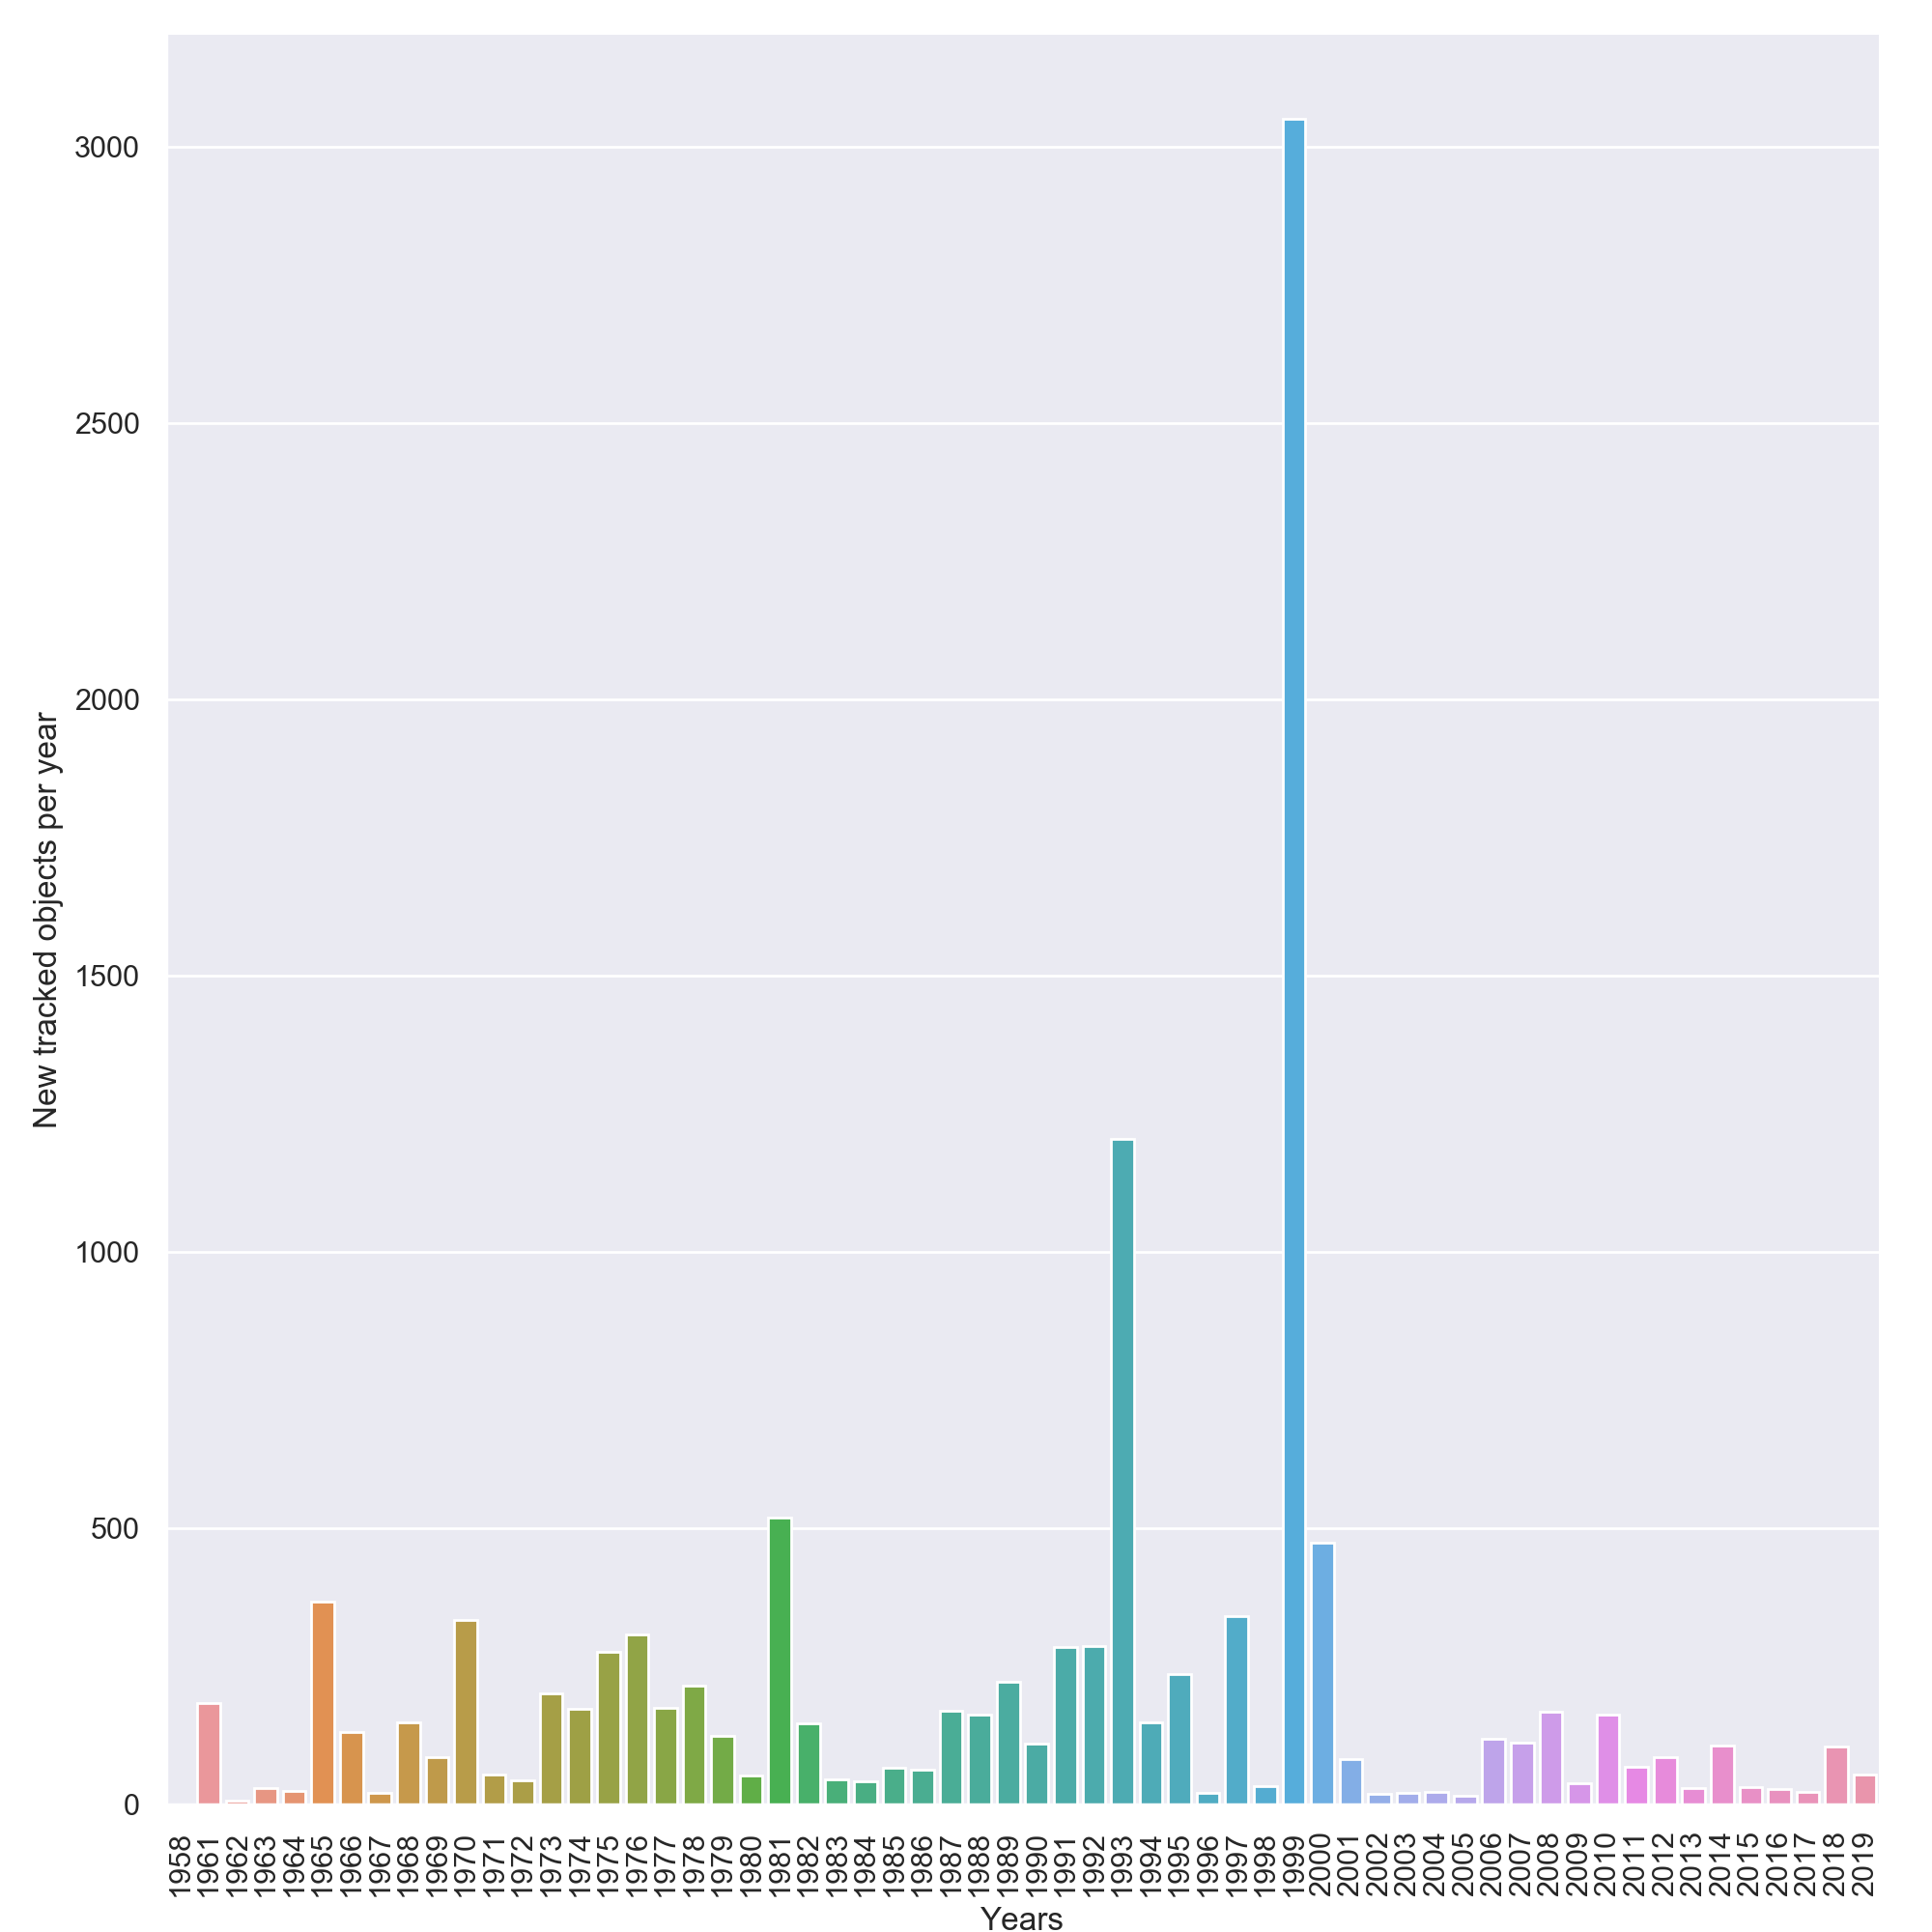

In [129]:
#cats = list(dfinfotot.year.apply(lambda x: str(x)[2:4]).unique())
cats = list(dfprop[dfprop.debc == 'True'].year.unique())
cats_v = list()
for x in cats:
    cats_v.append(dfprop[dfprop.debc == 'True'].groupby('year').get_group(x).launch.count())
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
#Cat_d = Cat_d.sort_values('Values', ascending = False)
#Cat_d = Cat_d.head(10)

plt.figure(figsize = (10,10))
sns.set(rc={'figure.figsize':(10,10)})
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=1);#11.7/8.27);
#fig = sns.catplot(x="cat_super", kind="count", data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Years', ylabel='New tracked objects per year')
plt.xticks(rotation=90)
fig.savefig("Yearly_launches_prop.png", format="png")
plt.show()

In [130]:
dfinfotot

,apogee,comment,country,decay,inclination,launch,norad_cat_id,object_id,object_name,perigee,period,rcs_size,rcsvalue,debc,year
24797,938.0,NaN,CIS,1957-12-01,65.10,1957-10-04,1,1957-001A,SL-1 R/B,214.0,96.19,LARGE,0,False,1957
24795,1659.0,NaN,CIS,1958-04-14,65.33,1957-11-03,3,1957-002A,SPUTNIK 2,211.0,103.74,SMALL,0,False,1957
24796,945.0,NaN,CIS,1958-01-03,65.00,1957-10-04,2,1957-001B,SPUTNIK 1,227.0,96.10,NaN,0,False,1957
20017,4226.0,NaN,US,NaN,34.27,1958-03-17,16,1958-002A,VANGUARD R/B,650.0,137.31,MEDIUM,0,False,1958
20020,3831.0,NaN,US,NaN,34.24,1958-03-17,5,1958-002B,VANGUARD 1,652.0,132.75,MEDIUM,0,False,1958
24708,NaN,NO INITIAL ELEMENTS,US,1958-12-07,NaN,1958-12-06,111,1958-008A,PIONEER 3,NaN,NaN,NaN,0,False,1958
24709,NaN,NO INITIAL ELEMENTS,US,1958-10-12,NaN,1958-10-11,110,1958-007A,PIONEER 1,NaN,NaN,NaN,0,False,1958
19665,3007.0,NaN,US,NaN,34.23,1958-03-17,1576,1958-002C,VANGUARD DEB,628.0,123.07,SMALL,0,True,1958
24790,585.0,NaN,US,1959-10-23,50.25,1958-07-26,9,1958-005A,EXPLORER 4,239.0,92.81,NaN,0,False,1958
24791,255.0,NaN,CIS,1960-04-06,65.06,1958-05-15,8,1958-004B,SPUTNIK 3,139.0,88.43,LARGE,0,False,1958


In [ ]:
plot1 = bkh.figure(y_range=(0, 20_000))
xaxis = LinearAxis()
yaxis = LinearAxis()
plot1.xaxis[0].axis_label = 'Month'
plot1.yaxis[0].axis_label = 'Kickstarter per month'
#volume_figure.vbar_stack(["buys"], x='timestamp', width=1.0, color=[colors.turquoise], source=source)
plot1.vbar(x = edges_mon[:-1], width = 0.9 * (edges_mon[1] - edges_mon[0]), top = pledges_mon, color = "#FF5E33", fill_alpha = 0.7, legend = 'all')
plot1.vbar(x = edges_mon[:-1], width = 0.9 * (edges_mon[1] - edges_mon[0]), top = pledges_succ_mon, color = "#9033FF", fill_alpha = 0.7, legend = 'successful')
plot1.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot1.add_layout(Grid(dimension=1, ticker=yaxis.ticker))
#plot1.output_backend = "png"
export_png(plot1, filename="Monthly.png")
bkh.show(plot1)

In [ ]:
cats = list(dfbox.country.unique())
cats_v = list()
for x in cats:
    a = df_tot6[df_tot6.success == 1][df_tot6.gender == 'female'].groupby('country').get_group(x).launch.count()
    b = df_tot6[df_tot6.success == 1][df_tot6.gender == 'male'].groupby('country').get_group(x).launch.count()
    #n = df_tot6[df_tot6.gender == 'female'].groupby('cat_super').get_group(x).usd_pledged.count()
    #m = df_tot6[df_tot6.gender == 'male'].groupby('cat_super').get_group(x).usd_pledged.count()
  
    #cats_v.append(a / n / (a / n + b / m))
    cats_v.append(n / (n + m))
#category_count, categories = np.histogram(df_tot6.cat_super, bins=df_tot6.cat_super.nunique(), 
 #                                     normed=False, weights=None, density=None, range = (1,15))
Cat_d = pd.DataFrame()
Cat_d['Category'] = cats
Cat_d['Values'] = cats_v
Cat_d = Cat_d.sort_values('Values')

plt.figure(figsize = (30,30))
sns.set(rc={'figure.figsize':(20,20)})
#fig = sns.catplot(x="cat_super", y = 'usd_pledged', kind="bar", data=df_tot6, height=10, aspect=11.7/8.27);
fig = sns.catplot(x="Category", y = 'Values', kind="bar", data=Cat_d, height=10, aspect=11.7/8.27);
#fig = sns.countplot(x="cat_super", y = 'usd_pledged', data=df_tot6, height=10, aspect=11.7/8.27);
#fig.set_xlabel("Categories",fontsize=15)
#fig.set_ylabel("Kickstarter projects per category",fontsize=15)
#fig.tick_params(labelsize=10)
fig.set(xlabel='Categories', ylabel='Rate of projects by women per category')
fig.savefig("Categories_succ_fem3.png", format="png")
plt.show()